# Importing and Uploading the Data

In [1]:
#importing packages and data
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import datetime as dt
import seaborn as sns
import statsmodels.api as sm
from sklearn import linear_model
import plotly.express as px
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

data = pd.read_csv('cleaned_data.csv',header= 0,encoding='unicode_escape')

# General Variables

In [2]:
top_5_categories = ['Cleats','Mens Footwear', 'Womens Apparel','Indoor/Outdoor Games','Fishing']


# 1. Shipping Delays by Categorical Data


## Shipping Delays by Categories

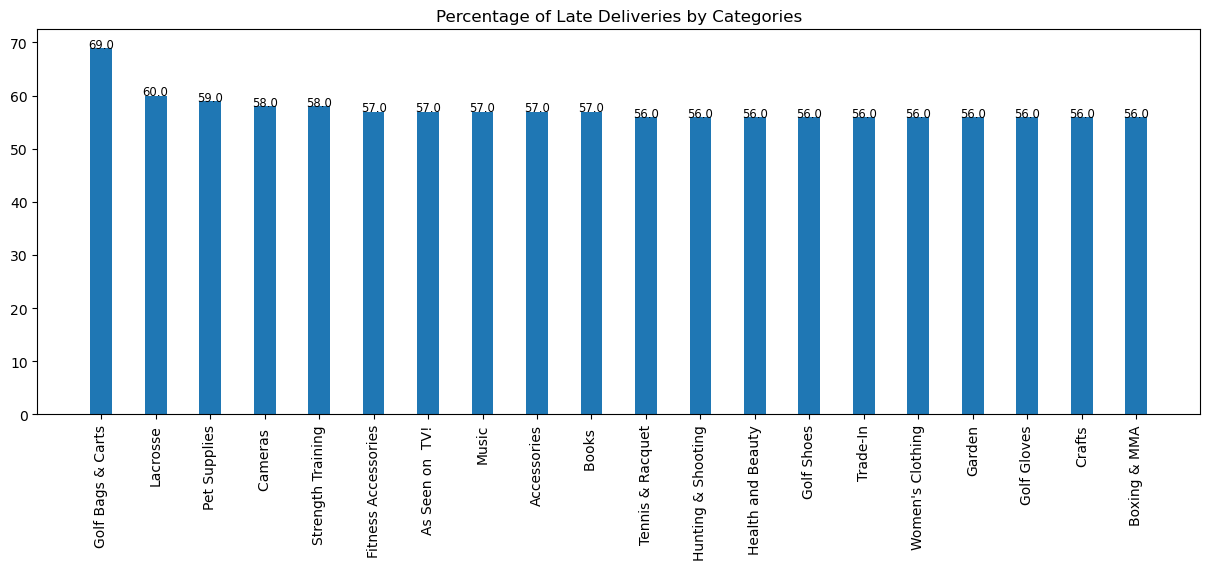

In [3]:
#Graphing Shipping Delays by Categories
late_category = data.groupby('Category Name',as_index=False).agg(No_of_Orders = ('Category Name','count'))
late = data[data['Delivery Status']=='Late delivery'].groupby('Category Name',as_index=False).agg(Late_Orders=('Category Name','count'))

late_category = pd.merge(late_category,late,how='left',on='Category Name')
late_category['Percentage of Late Orders'] = round(late_category['Late_Orders']/late_category['No_of_Orders']*100)
late_category=late_category.sort_values(by='Percentage of Late Orders',ascending=False)
late_category = late_category.reset_index()

fig = plt.figure(figsize = (15, 5))

def labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center',fontsize='small')

late_names = list(late_category['Category Name'][:20])
late_names_percentage = list(late_category['Percentage of Late Orders'][:20])
plt.xticks(rotation = 90)
plt.title('Percentage of Late Deliveries by Categories')

plt.bar(late_names, late_names_percentage, width = 0.4)
labels(late_names, late_names_percentage)

In [4]:
#A closer look at the Percentage of Late Orders by Category
late_category['Percentage of Late Orders'].describe()

count    50.000000
mean     55.380000
std       2.791313
min      48.000000
25%      54.000000
50%      55.000000
75%      56.000000
max      69.000000
Name: Percentage of Late Orders, dtype: float64

In [5]:
#Identifying which Category has the lowest percentage of late orders.
late_category.tail(1)

index     Category Name  No_of_Orders  Late_Orders  \
49     34  Men's Golf Clubs           283          135   

    Percentage of Late Orders  
49                       48.0

## Shipping Delays by Order Country

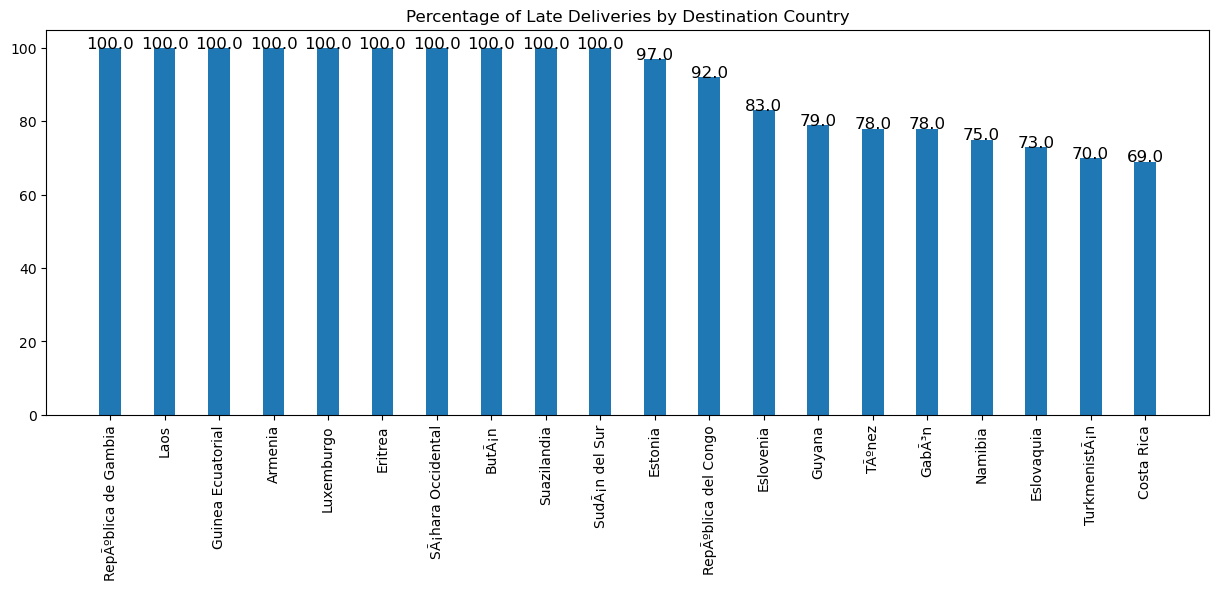

In [6]:
#Graphing Shipping Delays by Order Country (Destination Country)
late_order_country = data.groupby('Order Country',as_index=False).agg(No_of_Orders = ('Order Country','count'))
late = data[data['Delivery Status']=='Late delivery'].groupby('Order Country',as_index=False).agg(Late_Orders=('Order Country','count'))

late_order_country = pd.merge(late_order_country,late,how='left',on='Order Country')
late_order_country['Percentage of Late Orders'] = round(late_order_country['Late_Orders']/late_order_country['No_of_Orders']*100)
late_order_country=late_order_country.sort_values(by='Percentage of Late Orders',ascending=False)
late_order_country= late_order_country.reset_index()

fig = plt.figure(figsize = (15, 5))

def labels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], ha = 'center',fontsize='large')

late_names = list(late_order_country['Order Country'][:20])
late_names_percentage = list(late_order_country['Percentage of Late Orders'][:20])
plt.xticks(rotation = 90)
plt.title('Percentage of Late Deliveries by Destination Country')

plt.bar(late_names, late_names_percentage, width = 0.4)
labels(late_names, late_names_percentage)

In [7]:
late_order_country['Percentage of Late Orders'] = late_order_country['Percentage of Late Orders'].fillna(0)
late_order_country['Late_Orders'] = late_order_country['Late_Orders'].fillna(0)

late_order_country.head(10)

index         Order Country  No_of_Orders  Late_Orders  \
0    125  RepÃºblica de Gambia             5          5.0   
1     83                  Laos             6          6.0   
2     62     Guinea Ecuatorial             2          2.0   
3      7               Armenia             5          5.0   
4     88            Luxemburgo            10         10.0   
5     44               Eritrea             2          2.0   
6    144    SÃ¡hara Occidental             2          2.0   
7     24                ButÃ¡n             5          5.0   
8    137           Suazilandia             5          5.0   
9    140        SudÃ¡n del Sur             5          5.0   

   Percentage of Late Orders  
0                      100.0  
1                      100.0  
2                      100.0  
3                      100.0  
4                      100.0  
5                      100.0  
6                      100.0  
7                      100.0  
8                      100.0  
9                      100.0

In [8]:
#A closer look at the Percentage of Late Orders by Category
late_order_country['Percentage of Late Orders'].describe()

count    164.000000
mean      55.670732
std       19.172165
min        0.000000
25%       51.000000
50%       55.500000
75%       60.250000
max      100.000000
Name: Percentage of Late Orders, dtype: float64

In [9]:
#Identifying which Category has the lowest percentage of late orders.
late_order_country.tail(10)

index Order Country  No_of_Orders  Late_Orders  Percentage of Late Orders
154     89       LÃ­bano            20          6.0                       30.0
155     90     Macedonia             6          1.0                       17.0
156     22  Burkina Faso            11          1.0                        9.0
157     13       BarÃ©in             4          0.0                        0.0
158     23       Burundi             1          0.0                        0.0
159     29          Chad             3          0.0                        0.0
160     82        Kuwait             2          0.0                        0.0
161    110         OmÃ¡n             8          0.0                        0.0
162    131        Serbia             1          0.0                        0.0
163    143       Surinam             8          0.0                        0.0

In [10]:
#Identifying the countries with 100% late deliveries
late_names = list(late_order_country['Order Country'][:10])
print(late_names)

['RepÃºblica de Gambia', 'Laos', 'Guinea Ecuatorial', 'Armenia', 'Luxemburgo', 'Eritrea', 'SÃ¡hara Occidental', 'ButÃ¡n', 'Suazilandia', 'SudÃ¡n del Sur']


## Shipping Delays vs Categorical Data Summary
<b> Category Name:</b>
Based on the graph, Golf Bags & Carts have the highest percentage of late deliveries at 69%. The category Lacrosse follows with 60% of orders being late.

Taking a closer look at the statistics, an average of 55% of orders are late. The lowest percentage of late orders is 48%, which is the category Men's Gold Clubs.

<b> Order Country:</b>
In the data supply chain description, order country is defined as the order's destination.

10 countries appear to have a hundred percent late deliveries, while 7 countries have zero percent late orders.  

The number of orders does not appear to have any bearing to the late delivery rate since the aforementioned 10 countries and 7 countries have 10 or less orders each.

# 2. Customer Profiles

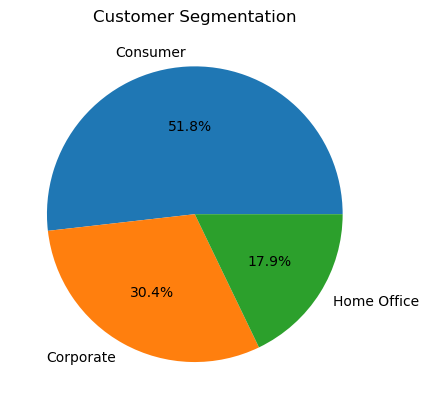

In [11]:
#Customer Segment Distribution
customer_segment = data['Customer Segment'].value_counts().rename_axis('unique_values').reset_index(name='counts')
fig, ax = plt.subplots()
plt.title("Customer Segmentation")
ax.pie(customer_segment['counts'], labels = customer_segment['unique_values'],autopct='%1.1f%%')

plt.show()

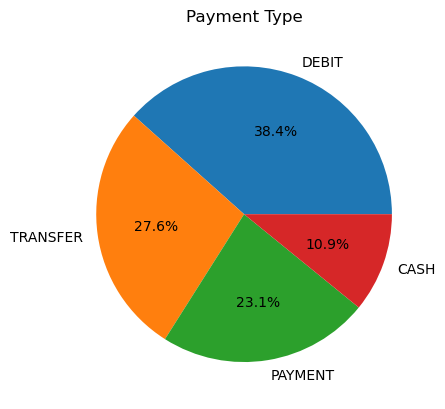

In [12]:
#Preferred Payment Type Distribution
pay_types = data['Type'].value_counts().rename_axis('unique_values').reset_index(name='counts')

fig, ax = plt.subplots()
plt.title("Payment Type")
ax.pie(pay_types['counts'], labels = pay_types['unique_values'],autopct='%1.1f%%')

plt.show()

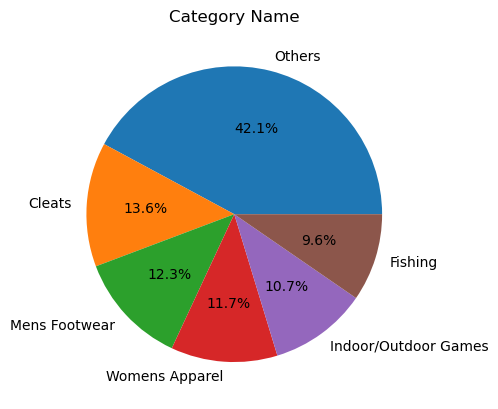

In [13]:
#Share Distribution by Category
categories = data['Category Name'].value_counts().rename_axis('unique_values').reset_index(name='counts')

#Separating Top 5 categories and Others
categories.loc[~categories['unique_values'].isin(top_5_categories),'unique_values'] = 'Others'
categories = categories.groupby(['unique_values'],as_index= False).sum().sort_values(by=['counts'], ascending=False)

fig, ax = plt.subplots()
plt.title("Category Name")
ax.pie(categories['counts'], labels = categories['unique_values'],autopct='%1.1f%%')

plt.show()

In [14]:
#Sunburst Chart for Customer Country and City
customer_country_city = data[['Customer Country','Customer City']].groupby(['Customer Country','Customer City'],as_index=False).agg(Total_Num_of_Sales=('Customer City','count')).sort_values(by='Total_Num_of_Sales',ascending=False)
customer_country_city

fig = px.sunburst(customer_country_city,path=['Customer Country','Customer City'],values='Total_Num_of_Sales',title='No. of Sales by Customer Country and City ')
fig.update_traces(textinfo="label+percent parent")
fig.show()

#Chart is interactive. Please click on the country to get a closer look at its cities.
#Data for targeted ads.

C:\Users\abbie\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\abbie\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



In [15]:
#Sunburst Chart for Order Country and City
order_country_city = data[['Order Country','Order City']].groupby(['Order Country','Order City'],as_index=False).agg(Total_Num_of_Sales=('Order City','count')).sort_values(by='Total_Num_of_Sales',ascending=False)
order_country_city

fig = px.sunburst(order_country_city,path=['Order Country','Order City'],values='Total_Num_of_Sales',title='No. of Sales by Order Country and City ')
fig.update_traces(textinfo="label+percent parent")
fig.show()

#Chart is interactive. Please click on the country to get a closer look at its cities.
#Data for future warehouse placement.

C:\Users\abbie\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.

C:\Users\abbie\anaconda3\lib\site-packages\plotly\io\_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



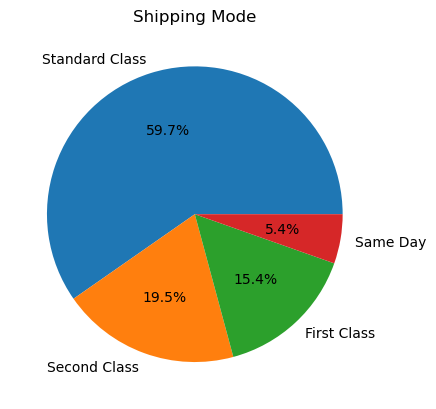

In [16]:
#Shipping Mode Distribution
shipping_mode = data['Shipping Mode'].value_counts().head().rename_axis('unique_values').reset_index(name='counts')

fig, ax = plt.subplots()
plt.title("Shipping Mode")
ax.pie(shipping_mode['counts'], labels = shipping_mode['unique_values'],autopct='%1.1f%%')

plt.show()

In [17]:
#Statistics of Real Shipping Days by Shipping Mode
data[['Days for shipping (real)']].groupby(data['Shipping Mode']).describe()

Days for shipping (real)                                     \
                                  count      mean       std  min  25%  50%   
Shipping Mode                                                                
First Class                     27814.0  2.000000  0.000000  2.0  2.0  2.0   
Same Day                         9737.0  0.478279  0.499554  0.0  0.0  0.0   
Second Class                    35216.0  3.990828  1.415900  2.0  3.0  4.0   
Standard Class                 107752.0  3.995907  1.417266  2.0  3.0  4.0   

                          
                75%  max  
Shipping Mode             
First Class     2.0  2.0  
Same Day        1.0  1.0  
Second Class    5.0  6.0  
Standard Class  5.0  6.0

In [18]:
#Average Order Value without Discount

aov = data['Sales'].mean()

aov

203.77209608630992

In [19]:
#Basket Size

basket_size = data['Order Item Quantity'].mean()

basket_size
#Basket Analysis requires Apriori Algorithm

2.127637533999191

In [20]:
#Average Order Item Discount Rate

discount_rate = data['Order Item Discount Rate'].mean()

discount_rate
#Are we losing money here? Are we giving away too much discount? And, to which product categories?

0.10166819055205392

In [21]:
#Average Profit per Order

profit_order = data['Order Profit Per Order'].mean()

profit_order
#Average profit per order is 21.97

21.974988638594276

In [22]:
#Profit Margin

profit_margin = profit_order/aov*100

profit_margin

10.784100993536686

## Customer Profile Summary
<b> Customer Segmentation: </b> 
Consumers make up 51.8% of total customers, followed by Corporate at 30.4% and Home Office at 17.9%.

<b> Payment Type: </b> 
Most popular payment type among the company's customers is Debit, consisting of 38.4%.

<b> Category Names: </b> 
The top 5 categories, namely Cleats, Men's Footwear, Women's Apparel, Indoor/ Outdoor Games, and Fishing, make up almost 60% of orders.

<b> Customer Country and City:</b> 
Customer Country and City are defined as which country and city the customer made the order in according to the Data Supply Chain Set Description file. The insights identified in this analysis can assist with geolocation marketing efforts.
    
The EE. UU. makes up 62% of orders, while the other 38% comes from Puerto Rico. The orders from EE. UU. are more equally distributed compared to Puerto Rico. The top 3 customer cities in EE. UU. are Chicago, Los Angeles, and Brooklyn, each is 3% of the total EE. UU. orders. On the other hand, Caguas is the main customer city in Puerto Rico, consisting 96% of Puerto Rico's orders. 

<b> Order Country and City:</b> 
Order Country and City are defined as which country and city the orders' destinations are according to the Data Supply Chain Set Description file. The insights identified in this analysis can assist with warehouse location planning to decrease delivery delays.
    
The top 5 order destination countries are Estados Unidos (14%), Francia (7%), Mexico (7%), Alemania (5%), and Australia (5%). The top 3 cities in Estados Unidos are New York City, Los Angeles, and Philadelphia, making up 9%, 7%, and 5% of Estados Unidos orders respectively.

<b> Shipping Mode:</b> 
59.7% of customers use Standard Class shipping, and only 5.4% avail the Same Day Shipping Option. The average delivery time of the company's Standard Class shipping is 3.99 days, while Same Day shipping is 0.48 days.

<b> AOV:</b> 
The Average Order Value of the company is 203.77, excluding discounts.

<b> Basket Size:</b> 
The Average Basket Size of the company is 2.13.

<b> Average Order Item Discount Rate:</b> 
The Average Order Item Discount Rate of the company is 10.17%.

<b> Average Profit per Order:</b> 
The Average Profit per Order of the company is 21.97.

<b> Profit Margin:</b> 
The Average Profit Margin of the company is 10.78%.

## Customer Segment Comparisons 

### Customer Segment: Consumer

In [23]:
consumer = data[data['Customer Segment'] == 'Consumer']

In [24]:
#Categorical Data

#Preferred Payment Type (Clustered Horizontal Bar)
consumer_paytype = consumer['Type'].value_counts().rename_axis('unique_values').reset_index(name='counts')

#Preferred Categories (separate by segment then x ticks are categories)
consumer_category = consumer['Category Name'].value_counts().rename_axis('unique_values').reset_index(name='counts')

#Customer Country
consumer_customer_country = consumer['Customer Country'].value_counts().rename_axis('unique_values').reset_index(name='counts')

#Order Country
consumer_order_country = consumer['Order Country'].value_counts().rename_axis('unique_values').reset_index(name='counts')

#Preferred Shipping Mode (Vertical Bar Chart)
consumer_ship_mode = consumer['Shipping Mode'].value_counts().rename_axis('unique_values').reset_index(name='counts')


In [25]:
#Numerical Data

#Average Order Value
consumer_aov = consumer['Sales'].mean()

#Average Basket Size
consumer_basket_size = consumer['Order Item Quantity'].mean()

#Average Discount per Order
consumer_discount = consumer['Order Item Discount Rate'].mean()

#Average Profit per Order
consumer_profit = consumer['Order Profit Per Order'].mean()

#Average Profit Margin
consumer_profit_margin = consumer_profit/consumer_aov


### Customer Segment: Corporate

In [26]:
corporate = data[data['Customer Segment'] == 'Corporate']

In [27]:
#Categorical Data

#Preferred Payment Type
corporate_paytype = corporate['Type'].value_counts().rename_axis('unique_values').reset_index(name='counts')

#Preferred Categories
corporate_category = corporate['Category Name'].value_counts().rename_axis('unique_values').reset_index(name='counts')

#Customer Country
corporate_customer_country = corporate['Customer Country'].value_counts().rename_axis('unique_values').reset_index(name='counts')

#Order Country
corporate_order_country = corporate['Order Country'].value_counts().rename_axis('unique_values').reset_index(name='counts')

#Preferred Shipping Mode
corporate_ship_mode = corporate['Shipping Mode'].value_counts().rename_axis('unique_values').reset_index(name='counts')


In [28]:
#Numerical Data

#Average Order Value
corporate_aov = corporate['Sales'].mean()

#Average Basket Size
corporate_basket_size = corporate['Order Item Quantity'].mean()

#Average Discount per Order
corporate_discount = corporate['Order Item Discount Rate'].mean()

#Average Profit per Order
corporate_profit = corporate['Order Profit Per Order'].mean()

#Average Profit Margin
corporate_profit_margin = corporate_profit/corporate_aov

### Customer Segment: Home Office

In [29]:
home_office = data[data['Customer Segment'] == 'Home Office']

In [30]:
#Categorical Data

#Preferred Payment Type
home_office_paytype = home_office['Type'].value_counts().rename_axis('unique_values').reset_index(name='counts')

#Preferred Categories
home_office_category = home_office['Category Name'].value_counts().rename_axis('unique_values').reset_index(name='counts')

#Customer Country
home_office_customer_country = home_office['Customer Country'].value_counts().rename_axis('unique_values').reset_index(name='counts')

#Order Country
home_office_order_country = home_office['Order Country'].value_counts().rename_axis('unique_values').reset_index(name='counts')

#Preferred Shipping Mode
home_office_ship_mode = home_office['Shipping Mode'].value_counts().rename_axis('unique_values').reset_index(name='counts')


In [31]:
#Numerical Data

#Average Order Value
home_office_aov = home_office['Sales'].mean()

#Average Basket Size
home_office_basket_size = home_office['Order Item Quantity'].mean()

#Average Discount per Order
home_office_discount = home_office['Order Item Discount Rate'].mean()

#Average Profit per Order
home_office_profit = home_office['Order Profit Per Order'].mean()

#Average Profit Margin
home_office_profit_margin = home_office_profit/home_office_aov

## Customer Segment Comparisons Graphs

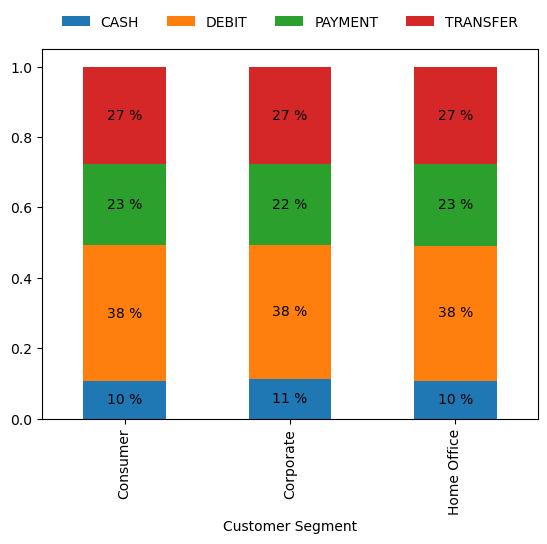

In [32]:
#Customer Segments by Payment Type
data1 = data.groupby('Customer Segment')['Type'].value_counts(normalize=True).unstack('Type')
data1.plot.bar(stacked=True)
plt.legend(
        bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        frameon=False,
        ncol=4)
for ix, row in data1.reset_index(drop=True).iterrows():
    percentage = 0
    for e in row:
        plt.text(
            ix,
            percentage + e / 2,
            f"{int(e * 100)} %",
            va="center",
            ha="center",
        )
        percentage += e

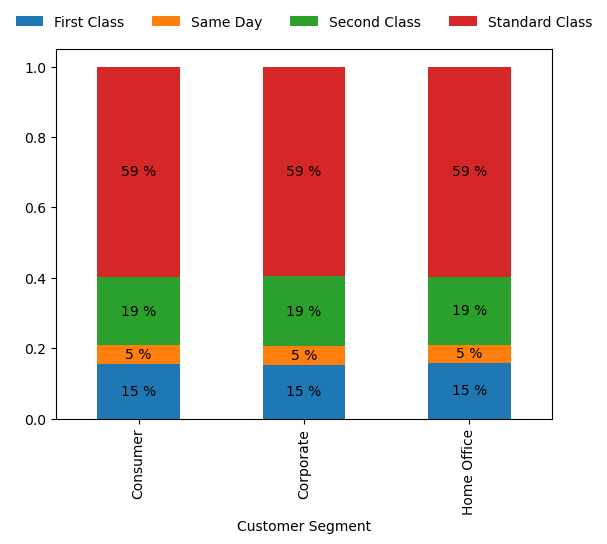

In [33]:
#Customer Segments by Shipping Mode
data1 = data.groupby('Customer Segment')['Shipping Mode'].value_counts(normalize=True).unstack('Shipping Mode')
data1.plot.bar(stacked=True)
plt.legend(
        bbox_to_anchor=(0.5, 1.02),
        loc="lower center",
        frameon=False,
        ncol=4)
for ix, row in data1.reset_index(drop=True).iterrows():
    percentage = 0
    for e in row:
        plt.text(
            ix,
            percentage + e / 2,
            f"{int(e * 100)} %",
            va="center",
            ha="center",
        )
        percentage += e

<AxesSubplot:xlabel='Category Name'>

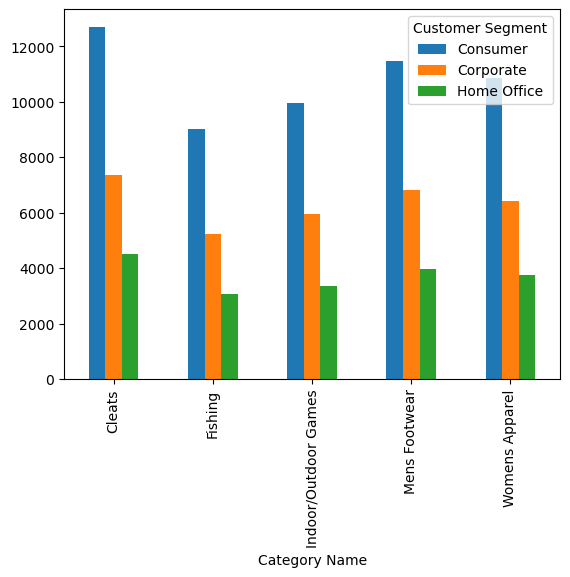

In [34]:
#Customer Segments by Product Categories
data2 = data[data['Category Name'].isin(top_5_categories)] 
data2 = data2.groupby(['Category Name','Customer Segment'])['Customer Segment'].count()

data2.unstack(level=1).plot.bar()


<AxesSubplot:xlabel='Customer Country'>

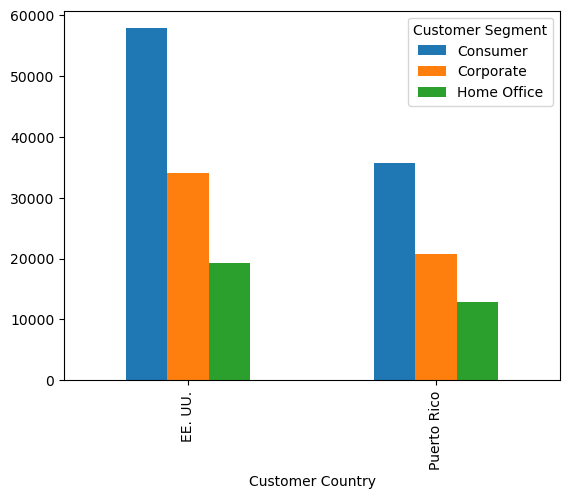

In [35]:
#Customer Segments by Customer Country
data2 = data.groupby(['Customer Country','Customer Segment'])['Customer Segment'].count()

data2.unstack(level=1).plot.bar()


<AxesSubplot:xlabel='Order Country'>

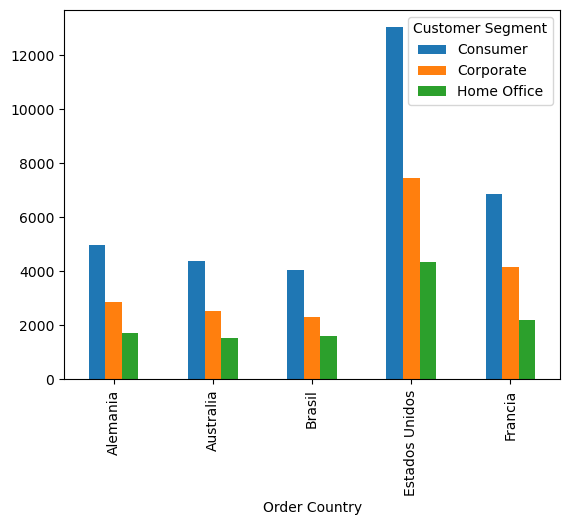

In [36]:
#Customer Segments by Order Country
top_5_countries = ['Estados Unidos','México','Francia','Alemania','Brasil','Australia']
data2 = data[data['Order Country'].isin(top_5_countries)] 
data2 = data2.groupby(['Order Country','Customer Segment'])['Customer Segment'].count()

data2.unstack(level=1).plot.bar()


In [37]:
#Numerical Data

#Average Order Value
print('\033[1m',"Average Order Value",'\033[0m')
print("Consumer AOV: ", round(consumer_aov,2))
print("Corporate AOV: ",round(corporate_aov,2))
print("Home Office AOV: ", round(home_office_aov,2))

#Average Basket Size
print('\033[1m',"\nAverage Basket Size",'\033[0m')
print("Consumer Basket Size: ", round(consumer_basket_size,2))
print("Corporate Basket Size: ", round(corporate_basket_size,2))
print("Home Office Basket Size: ",  round(home_office_basket_size,2))


#Average Discount per Order
print('\033[1m',"\nDiscount per Order",'\033[0m')
print("Consumer Discount per Order: ", round(consumer_discount*100,2),"%")
print("Corporate Discount per Order: ", round(corporate_discount*100,2),"%")
print("Home Office Discount per Order: ",  round(home_office_discount*100,2),"%")

#Average Profit per Order
print('\033[1m',"\nAverage Profit per Order",'\033[0m')
print("Consumer Profit per Order: ", round(consumer_profit,2))
print("Corporate Profit per Order: ", round(corporate_profit,2))
print("Home Office Profit per Order: ",  round(home_office_profit,2))

#Average Profit Margin
print('\033[1m',"\nAverage Profit Margin",'\033[0m')
print("Consumer Profit Margin: ", round(consumer_profit_margin*100,2),"%")
print("Corporate Profit Margin: ", round(corporate_profit_margin*100,2),"%")
print("Home Office Profit Margin: ",  round(home_office_profit_margin*100,2),"%")


 Average Order Value 
Consumer AOV:  204.22
Corporate AOV:  203.84
Home Office AOV:  202.34
 
Average Basket Size 
Consumer Basket Size:  2.13
Corporate Basket Size:  2.13
Home Office Basket Size:  2.12
 
Discount per Order 
Consumer Discount per Order:  10.16 %
Corporate Discount per Order:  10.16 %
Home Office Discount per Order:  10.19 %
 
Average Profit per Order 
Consumer Profit per Order:  22.18
Corporate Profit per Order:  21.95
Home Office Profit per Order:  21.44
 
Average Profit Margin 
Consumer Profit Margin:  10.86 %
Corporate Profit Margin:  10.77 %
Home Office Profit Margin:  10.59 %


## Customer Segmentation Profile Summary
The dataset classified 3 types of customers in its Customer Segment column, which are Consumer, Corporate, and Home Office. Under normal circumstance, Customer Segments show different purchasing metrics, such as basket size, average order value, product categories, etc.

After investigating the dataset based on the customer segments given, it was discovered that the purchasing behavior of all three customer segments are the same, or with minimal differences in decimal figures. Moving forward, the marketing team of the company can refer to the customer profile analysis above, or determine more ways to segment their customers. For example, customer demographics, like age, salary, etc., and behavioral attributes could also be collected by the company.

# 3. Recency, Frequency, and Monetary (RFM) Score Analysis

In [38]:
#Exclude Suspected Fraud and Canceled Transactions
rfm_data = data[(data['Order Status']!= 'CANCELED') & (data['Order Status']!= 'SUSPECTED_FRAUD')]

#Converting Order Date column into Date Time format
rfm_data['Order Date'] = pd.to_datetime(rfm_data['Order Date'])

#Creating Main RFM Table
rfm = rfm_data.groupby(by='Customer Id',as_index=False)['Order Date'].max()
latest_purchase = rfm['Order Date'].max()
rfm['Recency'] = rfm['Order Date'].apply(lambda x: (latest_purchase - x).days)

rfm = rfm.drop(columns='Order Date')

#Creating Frequency Table
rfm_frequency = rfm_data[['Customer Id']].groupby(by ='Customer Id').agg(Frequency=('Customer Id','count'))

#Merging Frequency Table to Main RFM Table
rfm = rfm.merge(rfm_frequency,how='left',on='Customer Id')

#Summing all sales per customer
rfm_monetary = rfm_data[['Customer Id','Sales']].groupby(by='Customer Id', as_index=False)['Sales'].sum()

#Merging Monetary Table to Main RFM Table
rfm = rfm.merge(rfm_monetary,how='left',on='Customer Id')
rfm.rename(columns = {'Sales':'Monetary'}, inplace = True)

rfm.head()

C:\Users\abbie\AppData\Local\Temp\ipykernel_6532\374768391.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Customer Id  Recency  Frequency     Monetary
0            1      792          1   499.950012
1            2      136         10  1819.730034
2            3      229         18  3537.680094
3            4      380         14  1719.630030
4            5      457          7  1274.750023

In [39]:
#Assigning Ranks to RFM Values
rfm['R_s'] = rfm['Recency'].rank(ascending=False)
rfm['F_s'] = rfm['Frequency'].rank(ascending=True)
rfm['M_s'] = rfm['Monetary'].rank(ascending=True)
 
#Normalizing the rank of the customers
rfm['R_score'] = (rfm['R_s']/rfm['R_s'].max())*100
rfm['F_score'] = (rfm['F_s']/rfm['F_s'].max())*100
rfm['M_score'] = (rfm['M_s']/rfm['M_s'].max())*100
 
rfm.drop(columns=['R_s', 'F_s', 'M_s'], inplace=True)


In [40]:
#Determining Frequency's Quantile
rfm_f = rfm['Frequency'].unique()
print("20th Quantile : ", np.quantile(rfm_f, .20))
print("40th Quantile : ", np.quantile(rfm_f, .40))
print("60th Quantile : ", np.quantile(rfm_f, .60))
print("80th Quantile : ", np.quantile(rfm_f, .80))
print("100th Quantile : ", np.quantile(rfm_f, 1))

20th Quantile :  10.0
40th Quantile :  19.0
60th Quantile :  28.0
80th Quantile :  37.0
100th Quantile :  47


In [41]:
#Categorizing RFM Ranks into scales of 1 to 5.
rfm['R Rank'] = pd.qcut(rfm['Recency'], 5, ['1','2','3','4','5'])

#forced to use unique values for quantiles. There were too many single purchasers.
rfm['F Rank'] = pd.cut(rfm['Frequency'], bins=[0,10,19,28,37,47] , labels = ['5','4','3','2','1'])

rfm['M Rank'] = pd.qcut(rfm['Monetary'], 5, ['5','4','3','2','1'])

In [42]:
#Calculating RFM Score
rfm['RFM Score'] = 0.15*rfm['R_score'] + 0.28*rfm['F_score'] + 0.57*rfm['M_score']
rfm['RFM Score'] *= 0.05
rfm['RFM Score'] = rfm['RFM Score'].round(2)

rfm['RFM Total Ranks'] = rfm['R Rank'].astype(str)+ rfm['F Rank'].astype(str) + rfm['M Rank'].astype(str)

In [43]:
def customer_value(RFM_Score):
    if RFM_Score >= 4.5:
        return "Top Customer"
    elif RFM_Score >= 4 and RFM_Score < 4.5:
        return "High Value Customer"
    elif RFM_Score >= 3 and RFM_Score < 4:
        return "Medium Value Customer"
    elif RFM_Score >= 1.6 and RFM_Score < 3:
        return "Low Value Customer"
    elif RFM_Score < 1.6:
        return "Lost Customer"

rfm['Customer Value'] = rfm['RFM Score'].apply(customer_value)

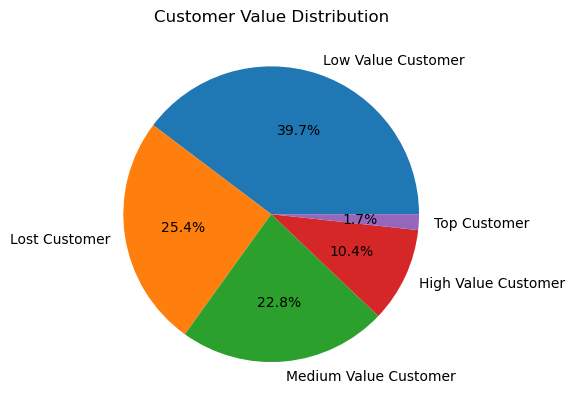

In [44]:
#Plotting Customer Value Distribution
customer_value = rfm['Customer Value'].value_counts().rename_axis('unique_values').reset_index(name='counts')

fig, ax = plt.subplots()
plt.title("Customer Value Distribution")
ax.pie(customer_value['counts'], labels = customer_value['unique_values'],autopct='%1.1f%%')

plt.show()

In [45]:
#Customer Value Statistics
rfm.groupby('Customer Value').agg(min_recency=('Recency', 'min'),max_recency=('Recency', 'max'),min_frequency=('Frequency', 'min'),max_frequency=('Frequency', 'max'),min_monetary=('Monetary', 'min'),max_monetary=('Monetary', 'max'),).reset_index()

Customer Value  min_recency  max_recency  min_frequency  \
0    High Value Customer          121          773             12   
1          Lost Customer            0         1122              1   
2     Low Value Customer            0         1125              1   
3  Medium Value Customer          121          968              6   
4           Top Customer          121          249             20   

   max_frequency  min_monetary  max_monetary  
0             42   3292.530012   8394.260208  
1              5     11.290000    499.950012  
2             16    260.649994   2659.760040  
3             24   1651.810036   4659.480080  
4             47   4604.290073  10524.170178

In [46]:
rfm['RFM Total Ranks'] = rfm['RFM Total Ranks'].apply(lambda x: int(x))


Champion  = [555, 554, 544, 545, 454, 455, 445]
Loyal_Customer = [543, 444, 435, 355, 354, 345, 344, 335]
Potential_Loyalist = [553, 551, 552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323]
New_Customer = [512, 511, 422, 421, 412, 411, 311]
Promising = [525, 524, 523, 522, 521, 515, 514, 513, 425,424, 413,414,415, 315, 314, 313]
Need_Attention = [535, 534, 443, 434, 343, 334, 325, 324]
Cannot_Lose_Them = [155, 154, 144, 214,215,115, 114, 113]
About_to_Sleep = [331, 321, 312, 221, 213]
At_Risk = [255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124]
Hibernating = [332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211]
Lost = [111, 112, 121, 131, 141, 151]


def RFM_Segmentation(RFM_Score):
    if RFM_Score in Champion:
        return "Champion"
    elif RFM_Score in Loyal_Customer:
        return "Loyal Customer"
    elif RFM_Score in Potential_Loyalist:
        return "Potential Loyalist"
    elif RFM_Score in New_Customer:
        return "New Customer"
    elif RFM_Score in Promising:
        return "Promising"
    elif RFM_Score in Need_Attention:
        return "Need Attention"
    elif RFM_Score in Cannot_Lose_Them:
        return "Cannot Lose Them"
    elif RFM_Score in About_to_Sleep:
        return "About to Sleep"
    elif RFM_Score in At_Risk:
        return "At Risk"
    elif RFM_Score in Hibernating:
        return "Hibernating"
    elif RFM_Score in Lost:
        return "Lost"

rfm['RFM Segmentation'] = rfm['RFM Total Ranks'].apply(RFM_Segmentation)
rfm.head()

Customer Id  Recency  Frequency     Monetary    R_score    F_score  \
0            1      792          1   499.950012   2.449514  19.979271   
1            2      136         10  1819.730034  56.872729  60.219140   
2            3      229         18  3537.680094  37.595472  85.824984   
3            4      380         14  1719.630030  18.775490  74.285573   
4            5      457          7  1274.750023  13.033591  50.318346   

     M_score R Rank F Rank M Rank  RFM Score  RFM Total Ranks  \
0  36.812102      5      5      4       1.35              554   
1  57.785894      3      5      3       2.92              353   
2  84.877351      4      4      1       3.90              441   
3  56.157149      5      4      3       2.78              543   
4  47.287893      5      5      3       2.15              553   

          Customer Value    RFM Segmentation  
0          Lost Customer            Champion  
1     Low Value Customer  Potential Loyalist  
2  Medium Value Customer  Potential Loyalist  
3     Low Value Customer      Loyal Customer  
4     Low Value Customer  Potential Loyalist

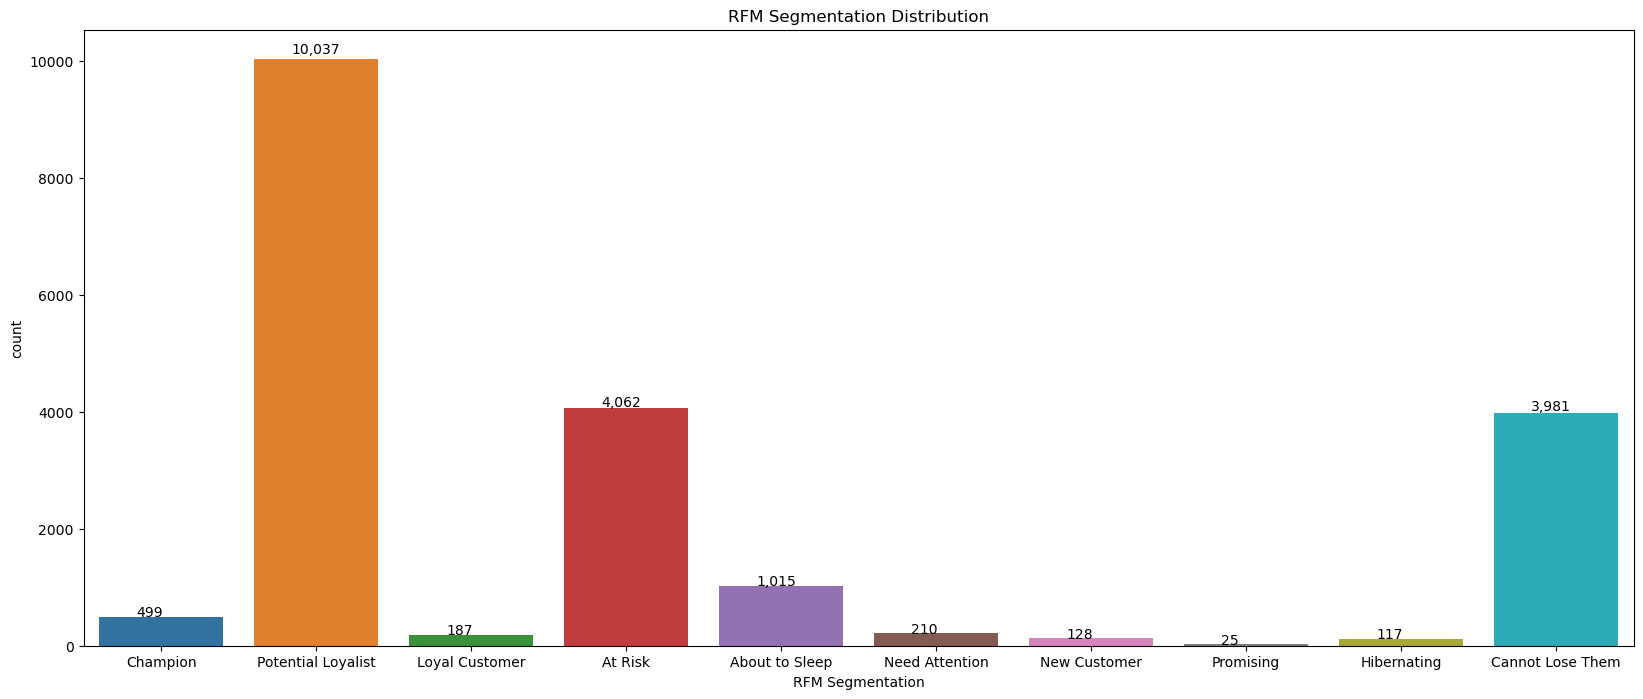

In [47]:
rfm_segment_count = rfm['RFM Segmentation']

plt.figure(figsize=(20,8))
plt.title("RFM Segmentation Distribution")

ax = sns.countplot(x=rfm_segment_count)
for p in ax.patches:
    ax.annotate(str(format(int(p.get_height()), ',d')), (p.get_x()+0.24, p.get_height()*1.01))
plt.show()

## RFM Analysis Summary

Order statuses marked as 'Canceled' and 'Suspected Fraud' were removed from this analysis as an RFM Analysis is focused on determining a company's best customers and assigning segments.

The RFM Score determines and ranks the company's best customers based on their Recency, Frequency, and Monetary scores. Recency, Frequency, and Monetary do not share equal weights. 

In this analysis, Monetary was given the largest weight, 57%, while Frequency has 28% and Recency makes up 15%. The weights should be dependent on the company's nature of business. However, in this scenario, since the company's nature of business is unclear, the weights were based from Geeks for Geeks's "RFM Analysis Analysis Using Python." 

Once the RFM Scores have been computed, customers are assigned customer value labels for easier categorization. The Customer Value Distribution plot shows that Top Customers only make up 1.7% of total customers, while Lost Customers, the lowest ranking, make up 25.4%. Customer Value labels were also referenced from Geeks for Geeks's "RFM Analysis Analysis Using Python."

Another RFM analysis was conducted, and rather than basing the scores on weights, the RFM Ranks were based on each metric's quantile value, ranging from 1 to 5, with 5 being the highest and 1 being the lowest.

Customers were segmented based on Connect If's article,"What Are RFM Scores and How To Calculate Them." The article provided guidance on which RFM Ranks corresponded to a specific client segment. The top segments were called Champion and Loyal Customers. Champions have recently purchased from the company, and they frequently make purchases and spend more money than normal customers. Loyal Customers frequently buy from the company and spend more than normal customers. And, on the other end of the spectrum, Lost Customers had the lowest scores in the recency, frequency, and monetary criteria.

Based on the plotted chart, there were 499 Champion customers and no Lost customers. The company's customer base largely consists of Potential Loyalists, making up 10,037 of its customers. According to Connect If, a strategy to convert Potential Loyalists into Loyal Customers is by inviting Potential Loyalists to membership/ loyalty programs.

# 4. Basket Analysis

## Basket Analysis by Category

In [48]:
#Creating a new dataframe that includes Customer Ids, Order Dates, and Category Names
basket_category = data[['Customer Id','Order Date','Category Name']].copy()

#Customer ID and Order Date were combined to make a single transaction receipt.
basket_category['single_transaction'] = basket_category['Customer Id'].astype(str)+'_'+ basket_category['Order Date'].astype(str)
basket_category.head()

Customer Id  Order Date   Category Name single_transaction
0        20755  2018-01-31  Sporting Goods   20755_2018-01-31
1        19492  2018-01-13  Sporting Goods   19492_2018-01-13
2        19491  2018-01-13  Sporting Goods   19491_2018-01-13
3        19490  2018-01-13  Sporting Goods   19490_2018-01-13
4        19489  2018-01-13  Sporting Goods   19489_2018-01-13

In [49]:
#Plotting Single Transactions as row labels and Category Names as column labels to let us know how many categories were purchased per transaction.
basket_category2 = pd.crosstab(basket_category['single_transaction'], basket_category['Category Name'])
basket_category2.head()

Category Name       Accessories  As Seen on  TV!  Baby   Baseball & Softball  \
single_transaction                                                             
10000_2015-03-27              0                0      0                    0   
10000_2017-10-02              0                0      0                    0   
10001_2015-04-30              0                0      0                    0   
10001_2015-11-10              0                0      0                    0   
10001_2016-08-24              0                0      0                    0   

Category Name       Basketball  Books   Boxing & MMA  CDs   Cameras   \
single_transaction                                                     
10000_2015-03-27             0       0             0     0         0   
10000_2017-10-02             0       0             0     0         0   
10001_2015-04-30             0       0             0     0         0   
10001_2015-11-10             0       0             0     0         0   
10001_2016-08-24             0       0             0     0         0   

Category Name       Camping & Hiking  ...  Sporting Goods  Strength Training  \
single_transaction                    ...                                      
10000_2015-03-27                   1  ...               0                  0   
10000_2017-10-02                   0  ...               0                  0   
10001_2015-04-30                   0  ...               0                  0   
10001_2015-11-10                   1  ...               0                  0   
10001_2016-08-24                   1  ...               0                  0   

Category Name       Tennis & Racquet  Toys  Trade-In  Video Games  \
single_transaction                                                  
10000_2015-03-27                   0     0         0            0   
10000_2017-10-02                   0     0         0            0   
10001_2015-04-30                   0     0         0            0   
10001_2015-11-10                   0     0         0            0   
10001_2016-08-24                   0     0         0            0   

Category Name       Water Sports  Women's Clothing  Women's Golf Clubs  \
single_transaction                                                       
10000_2015-03-27               0                 0                   0   
10000_2017-10-02               0                 0                   0   
10001_2015-04-30               0                 0                   0   
10001_2015-11-10               0                 0                   0   
10001_2016-08-24               0                 0                   0   

Category Name       Womens Apparel  
single_transaction                  
10000_2015-03-27                 0  
10000_2017-10-02                 1  
10001_2015-04-30                 0  
10001_2015-11-10                 0  
10001_2016-08-24                 0  

[5 rows x 50 columns]

In [50]:
#Basket analysis doesn't take into account purchase frequency. Function will convert anything more than 0 into 1.
def encoding(frequency):
    res = 0
    if frequency > 0:
        res = 1
    return res

basket_category_input = basket_category2.applymap(encoding)
basket_category_input.head()

Category Name       Accessories  As Seen on  TV!  Baby   Baseball & Softball  \
single_transaction                                                             
10000_2015-03-27              0                0      0                    0   
10000_2017-10-02              0                0      0                    0   
10001_2015-04-30              0                0      0                    0   
10001_2015-11-10              0                0      0                    0   
10001_2016-08-24              0                0      0                    0   

Category Name       Basketball  Books   Boxing & MMA  CDs   Cameras   \
single_transaction                                                     
10000_2015-03-27             0       0             0     0         0   
10000_2017-10-02             0       0             0     0         0   
10001_2015-04-30             0       0             0     0         0   
10001_2015-11-10             0       0             0     0         0   
10001_2016-08-24             0       0             0     0         0   

Category Name       Camping & Hiking  ...  Sporting Goods  Strength Training  \
single_transaction                    ...                                      
10000_2015-03-27                   1  ...               0                  0   
10000_2017-10-02                   0  ...               0                  0   
10001_2015-04-30                   0  ...               0                  0   
10001_2015-11-10                   1  ...               0                  0   
10001_2016-08-24                   1  ...               0                  0   

Category Name       Tennis & Racquet  Toys  Trade-In  Video Games  \
single_transaction                                                  
10000_2015-03-27                   0     0         0            0   
10000_2017-10-02                   0     0         0            0   
10001_2015-04-30                   0     0         0            0   
10001_2015-11-10                   0     0         0            0   
10001_2016-08-24                   0     0         0            0   

Category Name       Water Sports  Women's Clothing  Women's Golf Clubs  \
single_transaction                                                       
10000_2015-03-27               0                 0                   0   
10000_2017-10-02               0                 0                   0   
10001_2015-04-30               0                 0                   0   
10001_2015-11-10               0                 0                   0   
10001_2016-08-24               0                 0                   0   

Category Name       Womens Apparel  
single_transaction                  
10000_2015-03-27                 0  
10000_2017-10-02                 1  
10001_2015-04-30                 0  
10001_2015-11-10                 0  
10001_2016-08-24                 0  

[5 rows x 50 columns]

In [51]:
#Takes each column name and creates frozen sets/ combination of items bought together. Support is computed, which is the % of the itemset's against all orders.

# Checking descriptive statistics with minimum support of 0.01%
frequent_itemsets_category = apriori(basket_category_input.astype('bool'), min_support=0.001, use_colnames=True)

frequent_itemsets_category.describe()
#frequent_itemsets_category.shape

support
count  551.000000
mean     0.011620
std      0.032322
min      0.001006
25%      0.001539
50%      0.002514
75%      0.007946
max      0.310504

In [52]:
# A 0.7946% minimum support is the 75th percentile of all supports. It will be able to narrow down itemsets.

frequent_itemsets_category = apriori(basket_category_input.astype('bool'), min_support=0.007946, use_colnames=True)

frequent_itemsets_category

support                                           itemsets
0    0.026710                                      (Accessories)
1    0.009569                              (Baseball & Softball)
2    0.009020                                         (Cameras )
3    0.187271                                 (Camping & Hiking)
4    0.172949                                 (Cardio Equipment)
..        ...                                                ...
133  0.014673  (Womens Apparel, Indoor/Outdoor Games, Water S...
134  0.009447       (Mens Footwear, Shop By Sport, Water Sports)
135  0.012601     (Womens Apparel, Mens Footwear, Shop By Sport)
136  0.017354      (Womens Apparel, Mens Footwear, Water Sports)
137  0.008822      (Womens Apparel, Shop By Sport, Water Sports)

[138 rows x 2 columns]

In [53]:
#Generates Support, Confidence, Lift, Leverage, and Conviction

#Antecedents are the items added to the customer's cart first.
#Consequents are the items that may be added based on what the antecedent is. It has an if-then relationship with antecedent, if antecedent was added to the cart, then there is a likelihood that the consequent will be added.
#Support is defined as proportion where category or item X is present in all transactions.
#Antecedents Support is the proportion of how many transactions contain the category as the antecedent.
#Consequents Support is the support for the itemset with the consequent.
#Confidence is the probability of the consequent appearing if the basket contains the antecedent.
#Lift is the ratio of the consequent's sale when an antecedent sale. It can be interpreted as customers are (lift's value) times more likely to purchase the consequent if the company sold the antecedent.
#Leverage compares the frequency of the antecedent and consequent occurring together vs the frequency of the antecedent and consequent occurring separately. A leverage closer to zero indicates higher independence.
#Conviction shows how dependent the consequent is to the antecedent. A higher conviction means the consequent is highly dependent on the antecedent.

rules_category = association_rules(frequent_itemsets_category, metric="lift")

rules_category.head()
#rules_category.shape

antecedents         consequents  antecedent support  \
0            (Cleats)       (Accessories)            0.310504   
1       (Accessories)            (Cleats)            0.026710   
2  (Cardio Equipment)  (Camping & Hiking)            0.172949   
3  (Camping & Hiking)  (Cardio Equipment)            0.187271   
4            (Cleats)  (Camping & Hiking)            0.310504   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.026710  0.008365    0.026939  1.008610  0.000071    1.000236  
1            0.310504  0.008365    0.313177  1.008610  0.000071    1.003892  
2            0.187271  0.033429    0.193287  1.032122  0.001040    1.007457  
3            0.172949  0.033429    0.178505  1.032122  0.001040    1.006763  
4            0.187271  0.062713    0.201973  1.078502  0.004565    1.018422

In [54]:
#Sorting dataset to show highest Support, Confidence, and Lift.
rules_category.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)

antecedents             consequents  antecedent support  \
42         (Mens Footwear)                (Cleats)            0.286019   
43                (Cleats)         (Mens Footwear)            0.310504   
48        (Womens Apparel)                (Cleats)            0.272093   
49                (Cleats)        (Womens Apparel)            0.310504   
40  (Indoor/Outdoor Games)                (Cleats)            0.253093   
41                (Cleats)  (Indoor/Outdoor Games)            0.310504   
82        (Womens Apparel)         (Mens Footwear)            0.272093   
83         (Mens Footwear)        (Womens Apparel)            0.286019   
38               (Fishing)                (Cleats)            0.230893   
39                (Cleats)               (Fishing)            0.310504   

    consequent support   support  confidence      lift  leverage  conviction  
42            0.310504  0.094375    0.329960  1.062658  0.005565    1.029036  
43            0.286019  0.094375    0.303940  1.062658  0.005565    1.025747  
48            0.310504  0.090048    0.330944  1.065829  0.005562    1.030551  
49            0.272093  0.090048    0.290004  1.065829  0.005562    1.025228  
40            0.310504  0.084882    0.335380  1.080115  0.006296    1.037429  
41            0.253093  0.084882    0.273370  1.080115  0.006296    1.027905  
82            0.286019  0.083084    0.305353  1.067598  0.005261    1.027833  
83            0.272093  0.083084    0.290486  1.067598  0.005261    1.025923  
38            0.310504  0.076289    0.330408  1.064102  0.004596    1.029725  
39            0.230893  0.076289    0.245694  1.064102  0.004596    1.019622

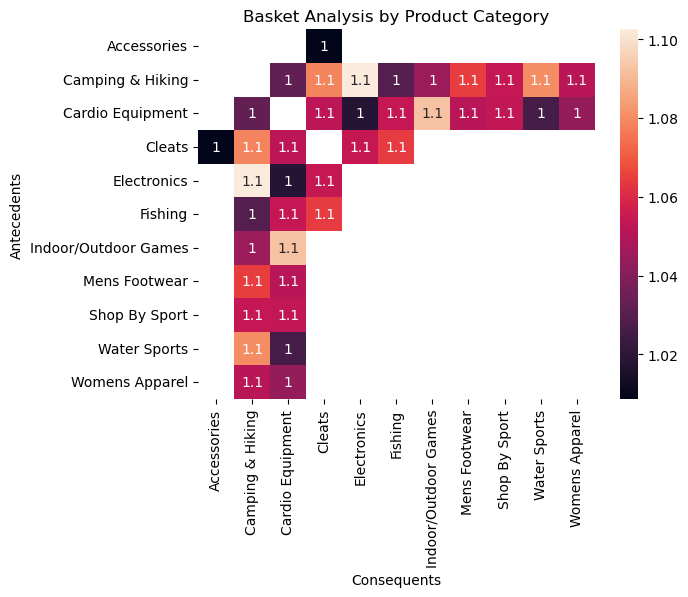

In [55]:
#Takes out the frozenset label in Antecedents and Consequents
rules_category['Antecedents'] = rules_category['antecedents'].apply(lambda x: ','.join(list(x)))
rules_category['Consequents'] = rules_category['consequents'].apply(lambda x: ','.join(list(x)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot_category = rules_category.head(40).pivot(index = 'Antecedents', columns = 'Consequents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot_category, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Basket Analysis by Product Category')
plt.show()

### Basket Analysis by Category Summary

A 0.007946 for minimum support was selected to narrow down selection.

The 5 most popular category combinations are:
- Men's Footwear and Cleats
- Women's Apparel and Cleats
- Inddor/Outdoor Games and Cleats
- Women's Apparel and Men's Footwear
- Fishing and Cleats

The company may use these combinations to design marketing campaigns.

The heatmap,'Basket Analysis by Product Category', also shows which Product Categories have an antecedent and consequent relationship.

## Basket Analysis by Category

In [56]:
#Creating a new dataframe that includes Customer Ids, Order Dates, and Product Names
basket_product = data[['Customer Id','Order Date','Product Name']].copy()
basket_product['single_transaction'] = basket_product['Customer Id'].astype(str)+'_'+ basket_product['Order Date'].astype(str)
basket_product.head()

Customer Id  Order Date  Product Name single_transaction
0        20755  2018-01-31  Smart watch    20755_2018-01-31
1        19492  2018-01-13  Smart watch    19492_2018-01-13
2        19491  2018-01-13  Smart watch    19491_2018-01-13
3        19490  2018-01-13  Smart watch    19490_2018-01-13
4        19489  2018-01-13  Smart watch    19489_2018-01-13

In [57]:
#Plotting Single Transactions as row labels and Category Names as column labels to let us know how many categories were purchased per transaction.

basket_product2 = pd.crosstab(basket_product['single_transaction'], basket_product['Product Name'])
basket_product2.head()

Product Name        Adult dog supplies  Baby sweater  Bag Boy Beverage Holder  \
single_transaction                                                              
10000_2015-03-27                     0             0                        0   
10000_2017-10-02                     0             0                        0   
10001_2015-04-30                     0             0                        0   
10001_2015-11-10                     0             0                        0   
10001_2016-08-24                     0             0                        0   

Product Name        Bag Boy M330 Push Cart  Bowflex SelectTech 1090 Dumbbells  \
single_transaction                                                              
10000_2015-03-27                         0                                  0   
10000_2017-10-02                         0                                  0   
10001_2015-04-30                         0                                  0   
10001_2015-11-10                         0                                  0   
10001_2016-08-24                         0                                  0   

Product Name        Bridgestone e6 Straight Distance NFL Carolina  \
single_transaction                                                  
10000_2015-03-27                                                0   
10000_2017-10-02                                                0   
10001_2015-04-30                                                0   
10001_2015-11-10                                                0   
10001_2016-08-24                                                0   

Product Name        Bridgestone e6 Straight Distance NFL San Dieg  \
single_transaction                                                  
10000_2015-03-27                                                0   
10000_2017-10-02                                                0   
10001_2015-04-30                                                0   
10001_2015-11-10                                                0   
10001_2016-08-24                                                0   

Product Name        Bridgestone e6 Straight Distance NFL Tennesse  \
single_transaction                                                  
10000_2015-03-27                                                0   
10000_2017-10-02                                                0   
10001_2015-04-30                                                0   
10001_2015-11-10                                                0   
10001_2016-08-24                                                0   

Product Name        Brooks Women's Ghost 6 Running Shoe  \
single_transaction                                        
10000_2015-03-27                                      0   
10000_2017-10-02                                      0   
10001_2015-04-30                                      0   
10001_2015-11-10                                      0   
10001_2016-08-24                                      0   

Product Name        Bushnell Pro X7 Jolt Slope Rangefinder  ...  \
single_transaction                                          ...   
10000_2015-03-27                                         0  ...   
10000_2017-10-02                                         0  ...   
10001_2015-04-30                                         0  ...   
10001_2015-11-10                                         0  ...   
10001_2016-08-24                                         0  ...   

Product Name        Under Armour Women's Ignite Slide  \
single_transaction                                      
10000_2015-03-27                                    0   
10000_2017-10-02                                    0   
10001_2015-04-30                                    0   
10001_2015-11-10                                    0   
10001_2016-08-24                                    1   

Product Name        Under Armour Women's Micro G Skulpt Running S  Web Camera  \
single_transaction                             

In [58]:
#Basket analysis doesn't take into account purchase frequency. Function will convert anything more than 0 into 1.
def encoding(frequency):
    res = 0
    if frequency > 0:
        res = 1
    return res

basket_product_input = basket_product2.applymap(encoding)
basket_product_input.head()

Product Name        Adult dog supplies  Baby sweater  Bag Boy Beverage Holder  \
single_transaction                                                              
10000_2015-03-27                     0             0                        0   
10000_2017-10-02                     0             0                        0   
10001_2015-04-30                     0             0                        0   
10001_2015-11-10                     0             0                        0   
10001_2016-08-24                     0             0                        0   

Product Name        Bag Boy M330 Push Cart  Bowflex SelectTech 1090 Dumbbells  \
single_transaction                                                              
10000_2015-03-27                         0                                  0   
10000_2017-10-02                         0                                  0   
10001_2015-04-30                         0                                  0   
10001_2015-11-10                         0                                  0   
10001_2016-08-24                         0                                  0   

Product Name        Bridgestone e6 Straight Distance NFL Carolina  \
single_transaction                                                  
10000_2015-03-27                                                0   
10000_2017-10-02                                                0   
10001_2015-04-30                                                0   
10001_2015-11-10                                                0   
10001_2016-08-24                                                0   

Product Name        Bridgestone e6 Straight Distance NFL San Dieg  \
single_transaction                                                  
10000_2015-03-27                                                0   
10000_2017-10-02                                                0   
10001_2015-04-30                                                0   
10001_2015-11-10                                                0   
10001_2016-08-24                                                0   

Product Name        Bridgestone e6 Straight Distance NFL Tennesse  \
single_transaction                                                  
10000_2015-03-27                                                0   
10000_2017-10-02                                                0   
10001_2015-04-30                                                0   
10001_2015-11-10                                                0   
10001_2016-08-24                                                0   

Product Name        Brooks Women's Ghost 6 Running Shoe  \
single_transaction                                        
10000_2015-03-27                                      0   
10000_2017-10-02                                      0   
10001_2015-04-30                                      0   
10001_2015-11-10                                      0   
10001_2016-08-24                                      0   

Product Name        Bushnell Pro X7 Jolt Slope Rangefinder  ...  \
single_transaction                                          ...   
10000_2015-03-27                                         0  ...   
10000_2017-10-02                                         0  ...   
10001_2015-04-30                                         0  ...   
10001_2015-11-10                                         0  ...   
10001_2016-08-24                                         0  ...   

Product Name        Under Armour Women's Ignite Slide  \
single_transaction                                      
10000_2015-03-27                                    0   
10000_2017-10-02                                    0   
10001_2015-04-30                                    0   
10001_2015-11-10                                    0   
10001_2016-08-24                                    1   

Product Name        Under Armour Women's Micro G Skulpt Running S  Web Camera  \
single_transaction                             

In [59]:
#Takes each column name and creates frozen sets/ combination of items bought together. Support is computed, which is the % of the itemset's against all orders.

# Checking descriptive statistics with minimum support of 0.01%
frequent_itemsets_product = apriori(basket_product_input.astype('bool'), min_support=0.001, use_colnames=True)

frequent_itemsets_product.describe()
#frequent_itemsets_category.shape

support
count  563.000000
mean     0.010626
std      0.031952
min      0.001006
25%      0.001234
50%      0.001646
75%      0.005378
max      0.310093

In [60]:
# A 0.5378% minimum support is the 75th percentile of all supports. It will be able to narrow down itemsets.

frequent_itemsets_product = apriori(basket_product_input.astype('bool'), min_support=0.005378, use_colnames=True)

frequent_itemsets_product

support                                           itemsets
0    0.007496                               (Adult dog supplies)
1    0.009934                               (Children's heaters)
2    0.007359                                            (DVDs )
3    0.006735                                      (Dell Laptop)
4    0.187271    (Diamondback Women's Serene Classic Comfort Bi)
..        ...                                                ...
136  0.008212  (Nike Men's Free 5.0+ Running Shoe, Perfect Fi...
137  0.017187  (Pelican Sunstream 100 Kayak, O'Brien Men's Ne...
138  0.008334  (Pelican Sunstream 100 Kayak, O'Brien Men's Ne...
139  0.012022  (O'Brien Men's Neoprene Life Vest, Perfect Fit...
140  0.009447  (Pelican Sunstream 100 Kayak, Perfect Fitness ...

[141 rows x 2 columns]

In [61]:
#Generates Support, Confidence, Lift, Leverage, and Conviction

rules_product = association_rules(frequent_itemsets_product, metric="lift")

rules_product.head()

antecedents  \
0  (Diamondback Women's Serene Classic Comfort Bi)   
1      (Field & Stream Sportsman 16 Gun Fire Safe)   
2  (Diamondback Women's Serene Classic Comfort Bi)   
3        (Nike Men's CJ Elite 2 TD Football Cleat)   
4  (Diamondback Women's Serene Classic Comfort Bi)   

                                       consequents  antecedent support  \
0      (Field & Stream Sportsman 16 Gun Fire Safe)            0.187271   
1  (Diamondback Women's Serene Classic Comfort Bi)            0.230893   
2        (Nike Men's CJ Elite 2 TD Football Cleat)            0.187271   
3  (Diamondback Women's Serene Classic Comfort Bi)            0.286019   
4           (Nike Men's Dri-FIT Victory Golf Polo)            0.187271   

   consequent support   support  confidence      lift  leverage  conviction  
0            0.230893  0.044506    0.237654  1.029278  0.001266    1.008867  
1            0.187271  0.044506    0.192754  1.029278  0.001266    1.006792  
2            0.286019  0.057015    0.304450  1.064441  0.003452    1.026499  
3            0.187271  0.057015    0.199339  1.064441  0.003452    1.015073  
4            0.272093  0.053571    0.286063  1.051343  0.002616    1.019568

In [62]:
#Sorting dataset to show highest Support, Confidence, and Lift.
rules_product.sort_values(["support", "confidence","lift"],axis = 0, ascending = False).head(10)

antecedents  \
39  (Nike Men's CJ Elite 2 TD Football Cleat)   
38         (Perfect Fitness Perfect Rip Deck)   
48     (Nike Men's Dri-FIT Victory Golf Polo)   
49         (Perfect Fitness Perfect Rip Deck)   
62         (O'Brien Men's Neoprene Life Vest)   
63         (Perfect Fitness Perfect Rip Deck)   
30     (Nike Men's Dri-FIT Victory Golf Polo)   
31  (Nike Men's CJ Elite 2 TD Football Cleat)   
34         (O'Brien Men's Neoprene Life Vest)   
35  (Nike Men's CJ Elite 2 TD Football Cleat)   

                                  consequents  antecedent support  \
39         (Perfect Fitness Perfect Rip Deck)            0.286019   
38  (Nike Men's CJ Elite 2 TD Football Cleat)            0.310093   
48         (Perfect Fitness Perfect Rip Deck)            0.272093   
49     (Nike Men's Dri-FIT Victory Golf Polo)            0.310093   
62         (Perfect Fitness Perfect Rip Deck)            0.253093   
63         (O'Brien Men's Neoprene Life Vest)            0.310093   
30  (Nike Men's CJ Elite 2 TD Football Cleat)            0.272093   
31     (Nike Men's Dri-FIT Victory Golf Polo)            0.286019   
34  (Nike Men's CJ Elite 2 TD Football Cleat)            0.253093   
35         (O'Brien Men's Neoprene Life Vest)            0.286019   

    consequent support   support  confidence      lift  leverage  conviction  
39            0.310093  0.094207    0.329374  1.062178  0.005515    1.028751  
38            0.286019  0.094207    0.303803  1.062178  0.005515    1.025545  
48            0.310093  0.089910    0.330440  1.065617  0.005536    1.030389  
49            0.272093  0.089910    0.289947  1.065617  0.005536    1.025145  
62            0.310093  0.084776    0.334959  1.080189  0.006293    1.037390  
63            0.253093  0.084776    0.273388  1.080189  0.006293    1.027932  
30            0.286019  0.083084    0.305353  1.067598  0.005261    1.027833  
31            0.272093  0.083084    0.290486  1.067598  0.005261    1.025923  
34            0.286019  0.076243    0.301246  1.053238  0.003854    1.021792  
35            0.253093  0.076243    0.266567  1.053238  0.003854    1.018371

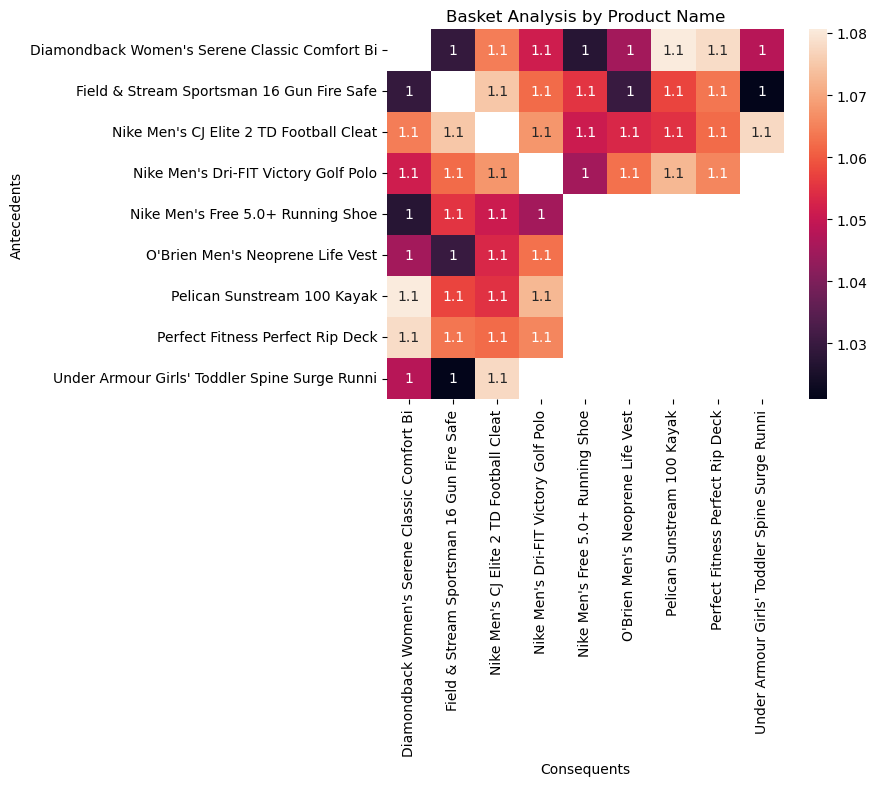

In [63]:
#Takes out the frozenset label in Antecedents and Consequents
rules_product['Antecedents'] = rules_product['antecedents'].apply(lambda x: ','.join(list(x)))
rules_product['Consequents'] = rules_product['consequents'].apply(lambda x: ','.join(list(x)))

# Transform the DataFrame of rules into a matrix using the lift metric
pivot_product = rules_product.head(50).pivot(index = 'Antecedents', columns = 'Consequents', values= 'lift')

# Generate a heatmap with annotations on and the colorbar off
sns.heatmap(pivot_product, annot = True)
plt.yticks(rotation=0)
plt.xticks(rotation=90)
plt.title('Basket Analysis by Product Name')
plt.show()

### Basket Analysis by Product Summary

A 0.005378 for minimum support was selected to narrow down selection.

The 5 most popular category combinations are:

- Nike Men's CJ Elite 2 TD Football Cleat and Perfect Fitness Perfect Rip Deck
- Nike Men's Dri-FIT Victory Golf Polo and Perfect Fitness Perfect Rip Deck
- O'Brien Men's Neoprene Life Vest and Perfect Fitness Perfect Rip Deck
- Nike Men's Dri-FIT Victory Golf Polo and Nike Men's CJ Elite 2 TD Football Cleat
- O'Brien Men's Neoprene Life Vest and Nike Men's CJ Elite 2 TD Football Cleat

The company may use these combinations to design marketing campaigns.

The heatmap,'Basket Analysis by Product Name', also shows which Product Categories have an antecedent and consequent relationship.

# 5. Simple Linear Regression

In [64]:
#Creating new dataframe specifically for sc sales data
sc_data = data[['Category Name','Order Status','Order Item Total','Order Date']]
sc_data = sc_data[(sc_data['Order Status']!= 'CANCELED') & (sc_data['Order Status']!= 'SUSPECTED_FRAUD')]


In [65]:
sc_data.head()

Category Name     Order Status  Order Item Total  Order Date
0  Sporting Goods         COMPLETE        314.640015  2018-01-31
1  Sporting Goods          PENDING        311.359985  2018-01-13
2  Sporting Goods           CLOSED        309.720001  2018-01-13
3  Sporting Goods         COMPLETE        304.809998  2018-01-13
4  Sporting Goods  PENDING_PAYMENT        298.250000  2018-01-13

In [66]:
#Checking if Cancelled and Suspected Fraud Orders were excluded.
sc_data['Order Status'].value_counts()

COMPLETE           59491
PENDING_PAYMENT    39832
PROCESSING         21902
PENDING            20227
CLOSED             19616
ON_HOLD             9804
PAYMENT_REVIEW      1893
Name: Order Status, dtype: int64

In [67]:
#Checking overall Category order counts.
sc_data['Category Name'].value_counts()

Cleats                  23514
Mens Footwear           21263
Womens Apparel          20116
Indoor/Outdoor Games    18470
Fishing                 16595
Water Sports            14880
Camping & Hiking        13157
Cardio Equipment        11948
Shop By Sport           10515
Electronics              3024
Accessories              1697
Golf Balls               1403
Girls' Apparel           1137
Golf Gloves              1029
Trade-In                  926
Video Games               804
Women's Clothing          631
Children's Clothing       622
Baseball & Softball       607
Hockey                    588
Cameras                   562
Toys                      507
Golf Shoes                502
Pet Supplies              472
Garden                    466
DVDs                      459
Crafts                    458
Golf Apparel              429
Computers                 425
Hunting & Shooting        424
Music                     417
Consumer Electronics      409
Boxing & MMA              402
Books     

In [68]:
#Data's starting date
sc_data['Order Date'].min()

'2015-01-01'

In [69]:
#Data's end date
sc_data['Order Date'].max()

'2018-01-31'

In [70]:
#Year over year dataframes
sc_data_2018 = sc_data[(sc_data['Order Date']>='2018-01-01') & (sc_data['Order Date']<='2018-12-31')].sort_values(by='Order Date',ascending=True)
sc_data_2017 = sc_data[(sc_data['Order Date']>='2017-01-01') & (sc_data['Order Date']<='2017-12-31')].sort_values(by='Order Date',ascending=True)
sc_data_2016 = sc_data[(sc_data['Order Date']>='2016-01-01') & (sc_data['Order Date']<='2016-12-31')].sort_values(by='Order Date',ascending=True)
sc_data_2015 = sc_data[(sc_data['Order Date']>='2015-01-01') & (sc_data['Order Date']<='2015-12-31')].sort_values(by='Order Date',ascending=True)

In [71]:
#Checking top 5 categories in 2015
sc_data_2015['Category Name'].value_counts().head()

Cleats                  8535
Mens Footwear           7597
Womens Apparel          7272
Indoor/Outdoor Games    6712
Fishing                 5990
Name: Category Name, dtype: int64

In [72]:
#Checking top 5 categories in 2016
sc_data_2016['Category Name'].value_counts().head()

Cleats                  8612
Mens Footwear           7823
Womens Apparel          7370
Indoor/Outdoor Games    6785
Fishing                 6059
Name: Category Name, dtype: int64

In [73]:
#Checking top 5 categories in 2017
sc_data_2017['Category Name'].value_counts().head()

Cleats                  6367
Mens Footwear           5843
Womens Apparel          5474
Indoor/Outdoor Games    4973
Fishing                 4546
Name: Category Name, dtype: int64

In [74]:
#Checking top 5 categories in 2018
sc_data_2018['Category Name'].value_counts().head()

Video Games         586
Women's Clothing    364
Toys                265
Pet Supplies        241
Sporting Goods      199
Name: Category Name, dtype: int64

In [75]:
#Since usual top 5 categories were not present in 2018's top 5, checking value counts for all categories in 2018.
sc_data_2018['Category Name'].value_counts()

Video Games          586
Women's Clothing     364
Toys                 265
Pet Supplies         241
Sporting Goods       199
Music                135
Health and Beauty    118
Garden                92
Men's Clothing        30
DVDs                   7
Name: Category Name, dtype: int64

## Initial Data Exploration Findings
Top 5 categories for the past 3 years are Cleats, Men's Footwear, Women's Apparel, Indoor/Outdoor Games, and Fishing.

2017 saw a slight decline in sales for its top 5 categories, and in 2018, none of the top 5 categories in previous year generated any sales, suggesting an error in the sales tracking system.


## Prepping Data for Graphing 

In [76]:
#Create date table based on month
date_sales = pd.DataFrame({'Order Date':pd.date_range(start='2015-1', end='2018-2',freq="M")})
date_sales['Monthly'] =pd.PeriodIndex(date_sales['Order Date'] ,freq='M')
sc_data['Monthly'] = pd.PeriodIndex(sc_data['Order Date'] ,freq='M')

In [77]:
#Monthly sales were selected due to the vast number of data points if daily sales were selected

#Join to main sc dataframe - Cleats Monthly Sales
cleats = sc_data[sc_data['Category Name']=='Cleats'].groupby(sc_data['Monthly']).agg(Cleats = ('Order Item Total','sum'))
date_sales = pd.merge(date_sales,cleats,how='left',on='Monthly')

#Join to main sc dataframe - Men's Footwear Monthly Sales
mfootwear = sc_data[sc_data['Category Name']=='Mens Footwear'].groupby(sc_data['Monthly']).agg(Mens_Footwear = ('Order Item Total','sum'))
date_sales = pd.merge(date_sales,mfootwear,how='left',on='Monthly')

#Join to main sc dataframe - Women's Apparel Monthly Sales
wapparel = sc_data[sc_data['Category Name']=='Womens Apparel'].groupby(sc_data['Monthly']).agg(Womens_Apparel = ('Order Item Total','sum'))
date_sales = pd.merge(date_sales,wapparel,how='left',on='Monthly')

#Join to main sc dataframe - Indoor/Outdoor Games Monthly Sales
in_out_game = sc_data[sc_data['Category Name']=='Indoor/Outdoor Games'].groupby(sc_data['Monthly']).agg(In_Out_Games = ('Order Item Total','sum'))
date_sales = pd.merge(date_sales,in_out_game,how='left',on='Monthly')

#Join to main sc dataframe - Fishing Monthly Sales
fishing = sc_data[sc_data['Category Name']=='Fishing'].groupby(sc_data['Monthly']).agg(Fishing = ('Order Item Total','sum'))
date_sales = pd.merge(date_sales,fishing,how='left',on='Monthly')

date_sales.head()

Order Date  Monthly         Cleats  Mens_Footwear  Womens_Apparel  \
0 2015-01-31  2015-01  123048.551573   68907.099454        79498.50   
1 2015-02-28  2015-02  102379.101377   70329.179494        76336.50   
2 2015-03-31  2015-03  123417.431681   69555.089483        86062.25   
3 2015-04-30  2015-04  111247.671415   74217.799428        82779.00   
4 2015-05-31  2015-05  115239.061471   71983.939489        82304.50   

   In_Out_Games        Fishing  
0  80238.269299  186989.885138  
1  68295.579400  153129.724187  
2  82371.369270  182088.155004  
3  76106.899265  181282.194982  
4  71713.869357  174974.544775

In [78]:
#Assigning new variable to sc data specific titles
sc_top_5_categories = ['Cleats', 'Mens_Footwear', 'Womens_Apparel','In_Out_Games', 'Fishing']

#Making a total column for top 5 categories
date_sales['Total']= date_sales[sc_top_5_categories].sum(axis=1)

#Checking tail rows
date_sales.tail()

#Filling NaN values with 0
date_sales= date_sales.fillna(0)

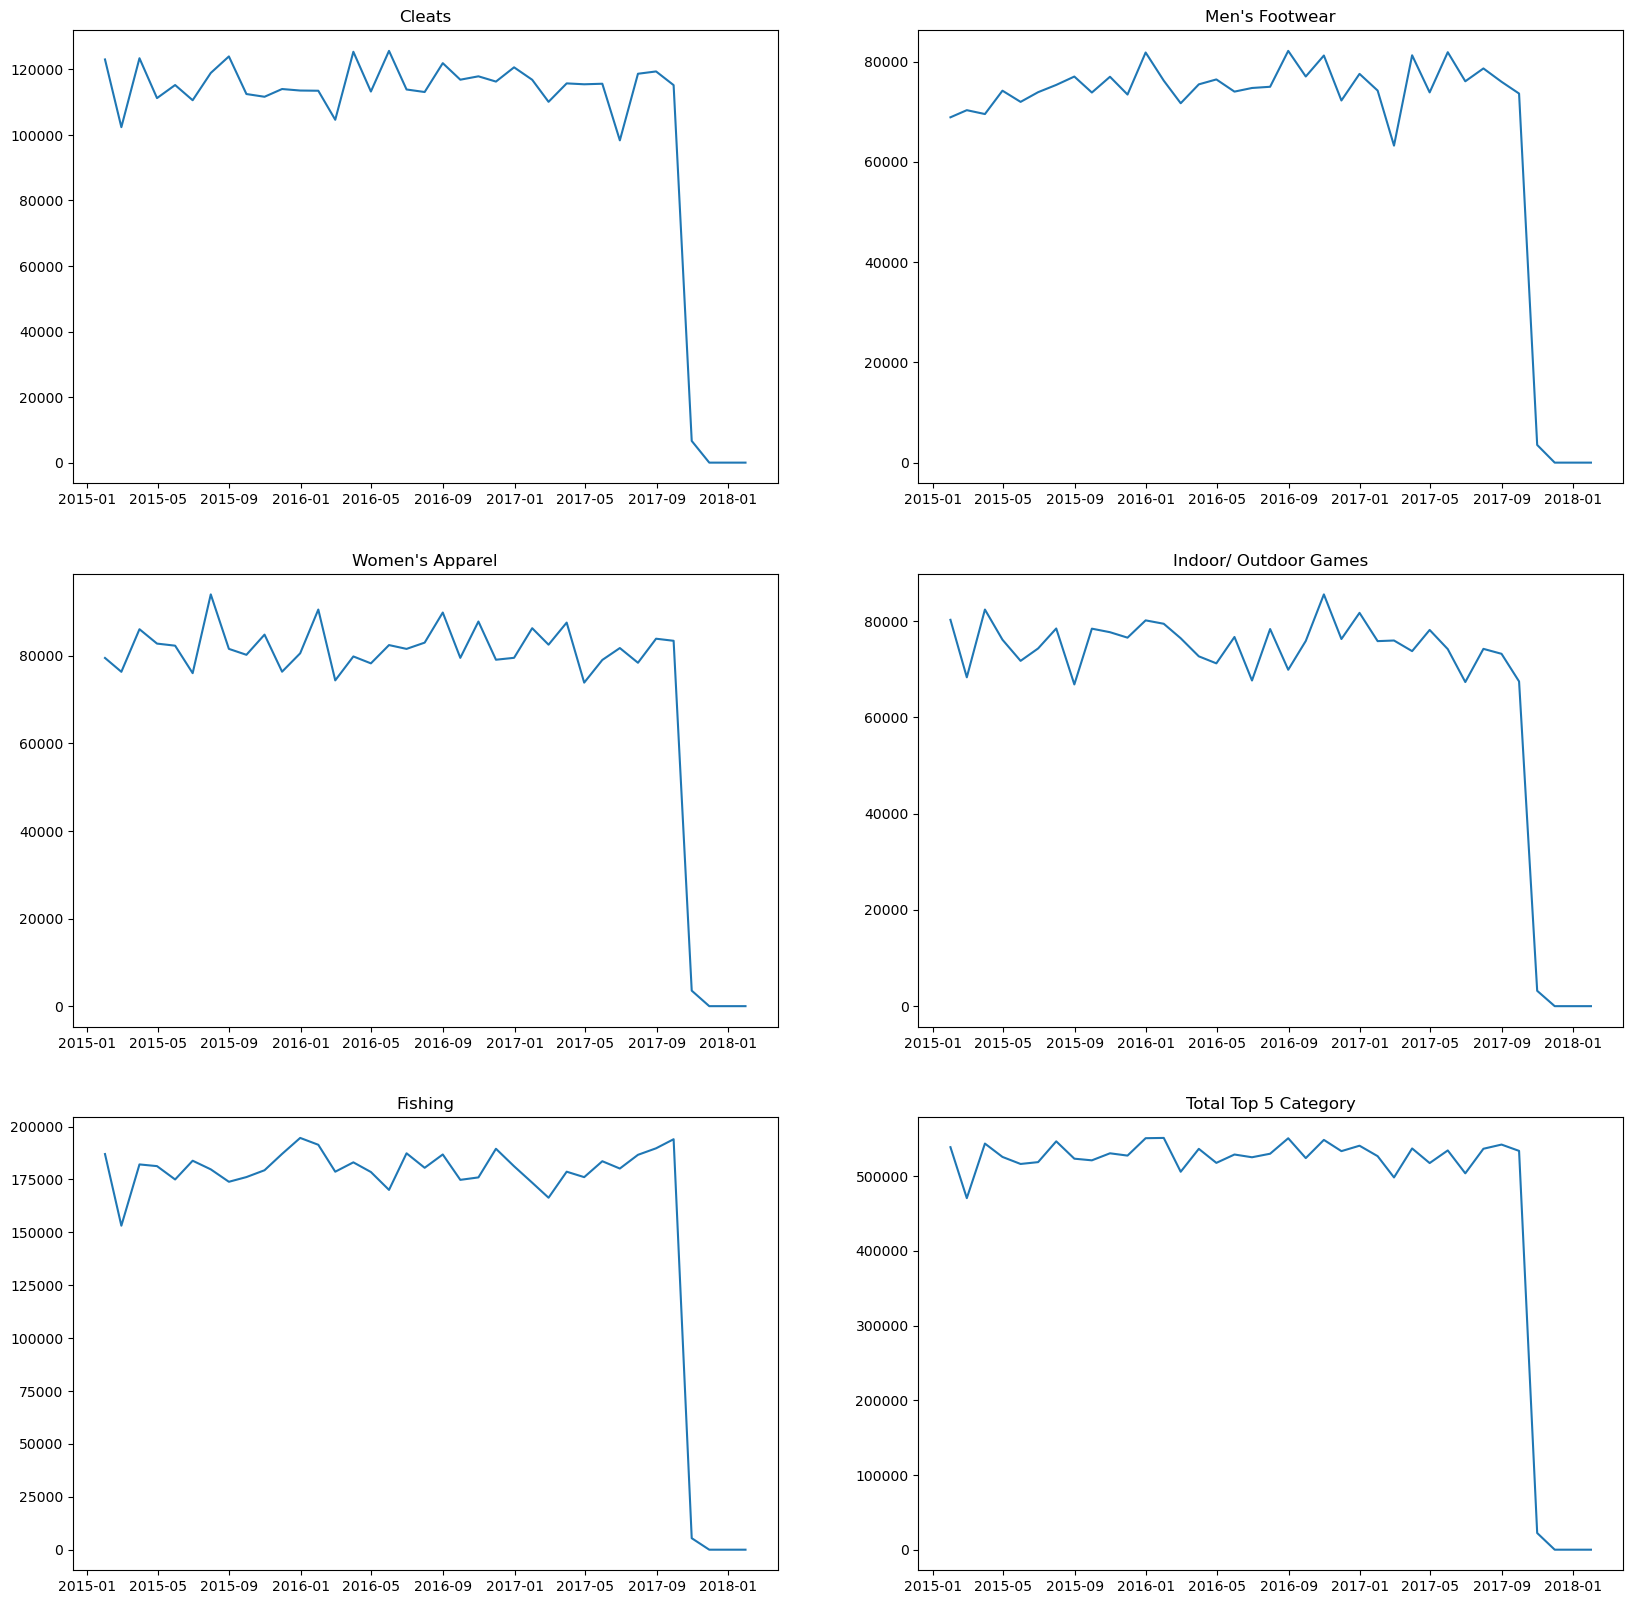

In [79]:
#Plotting Top 5 categories and their total in line charts
figure, axis = plt.subplots(3, 2)

figure.set_figheight(20)
figure.set_figwidth(20)


axis[0, 0].plot(date_sales['Order Date'], date_sales['Cleats'])
axis[0, 0].set_title("Cleats")

axis[0, 1].plot(date_sales['Order Date'], date_sales['Mens_Footwear'])
axis[0, 1].set_title("Men's Footwear")

axis[1, 0].plot(date_sales['Order Date'], date_sales['Womens_Apparel'])
axis[1, 0].set_title("Women's Apparel")

axis[1, 1].plot(date_sales['Order Date'], date_sales['In_Out_Games'])
axis[1, 1].set_title("Indoor/ Outdoor Games")

axis[2, 0].plot(date_sales['Order Date'], date_sales['Fishing'])
axis[2, 0].set_title("Fishing")

axis[2, 1].plot(date_sales['Order Date'], date_sales['Total'])
axis[2, 1].set_title("Total Top 5 Category")

plt.savefig('Monthly Sales')
plt.show()

## SC Linear Regression

In [80]:
#Grid Format

sns.set_style('darkgrid') # darkgrid, white grid, dark, white and ticks
plt.rc('axes', titlesize=23)     # fontsize of the axes title
plt.rc('axes', labelsize=20)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=16)    # fontsize of the tick labels
plt.rc('ytick', labelsize=16)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('font', size=16)          # controls default text sizes

In [81]:
#Creating days elapsed list since linear regression doesn't work on data with date time format
days_elapsed = (date_sales['Order Date'] - date_sales['Order Date'][0]).dt.days
days_elapsed_reshaped = days_elapsed.values.reshape(-1, 1)
days_elapsed_reshaped = days_elapsed_reshaped

### Top 5 Category Total 

In [82]:
#Adding the constant and model fitting
numeric = pd.to_numeric(date_sales['Order Date'],errors='raise', downcast=None)
x = sm.add_constant(days_elapsed_reshaped)
y = date_sales['Total']
lm = sm.OLS(y,x).fit()
lm.predict(x)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     13.38
Date:                Fri, 31 Mar 2023   Prob (F-statistic):           0.000830
Time:                        22:30:30   Log-Likelihood:                -490.59
No. Observations:                  37   AIC:                             985.2
Df Residuals:                      35   BIC:                             988.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        6.16e+05   4.59e+04     13.430      0.000    5.23e+05    7.09e+05
x1          -263.6911     72.091     -3.658      0.001    -410.044    -117.338
==============================================================================
Omnibus:                       11.537   Durbin-Watson:                   0.392
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.043
Skew:                          -1.249   Prob(JB):                      0.00400
Kurtosis:                       3.963   Cond. No.                     1.24e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.24e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [83]:
# Days coef: -263.6911
# Constant coef: 616000

# Linear equation: 𝑦 = 𝑎𝑥 + 𝑏
y_pred = -263.6911*x[:,1] + 616000

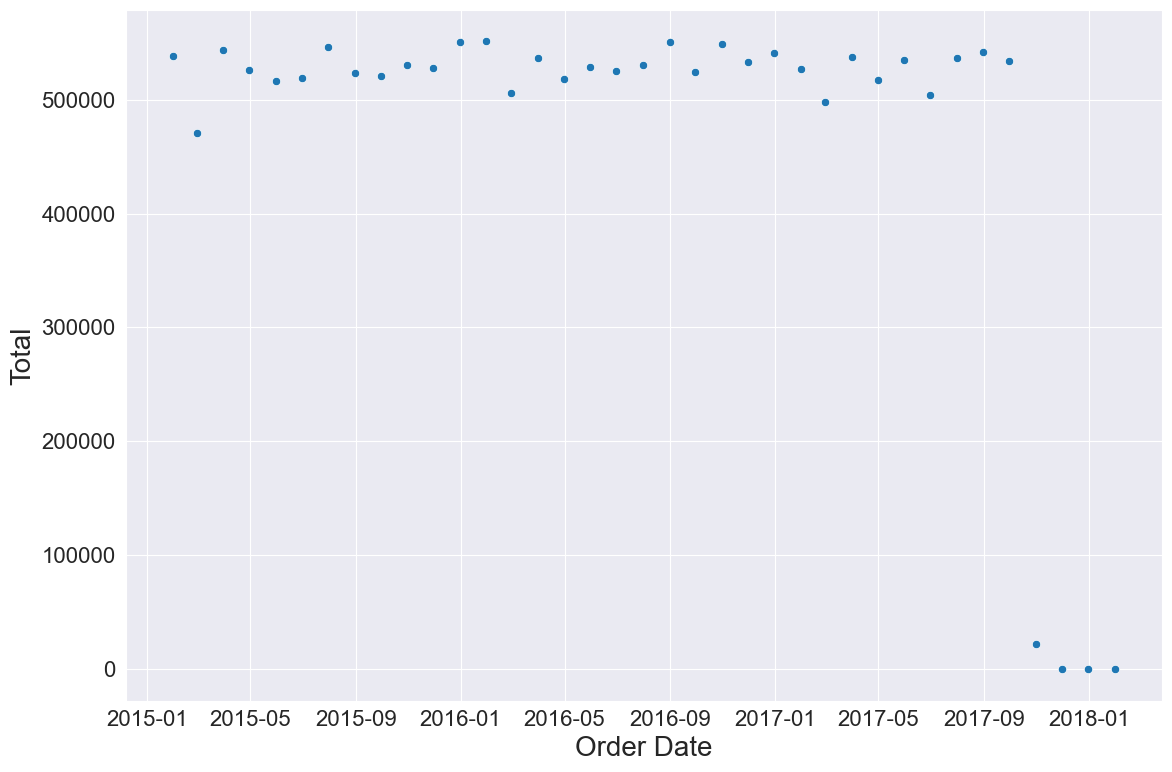

In [84]:
#Plotting the total column's sales
plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(x=date_sales['Order Date'], y=y)
plt.show()

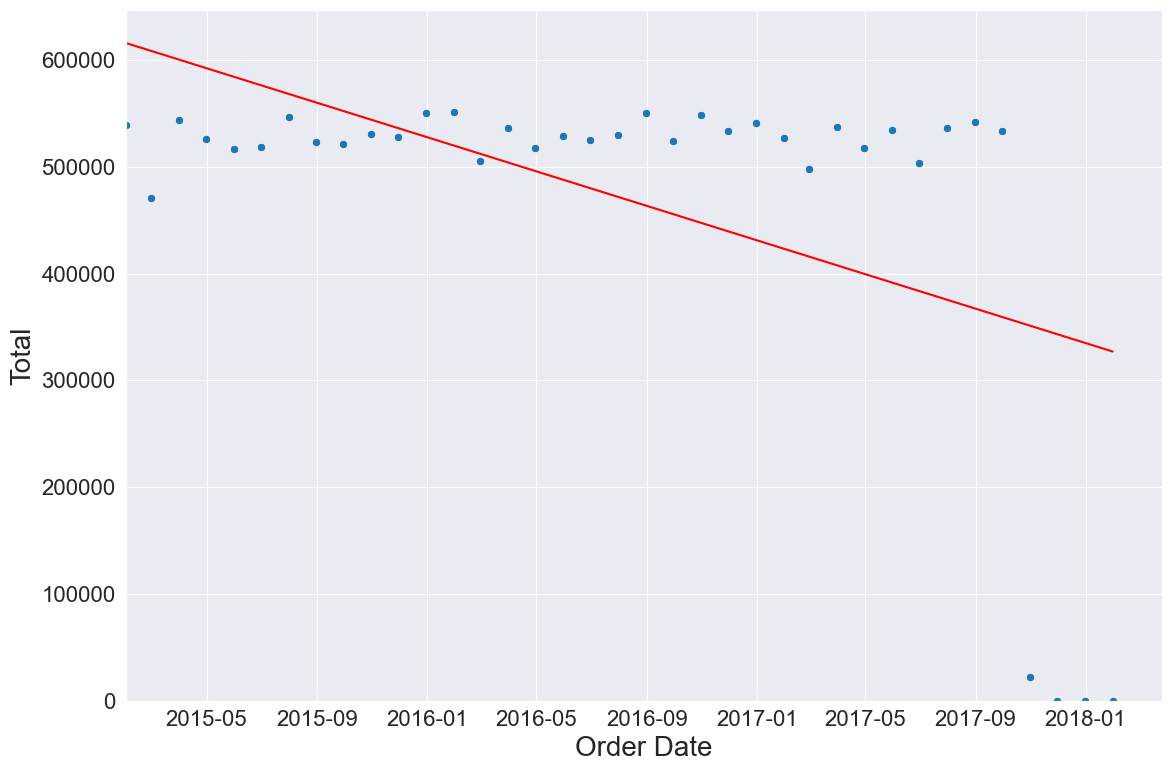

In [85]:
#Plotting the total column's sales
plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(x=date_sales['Order Date'], y=y)

#plotting the line
sns.lineplot(x=date_sales['Order Date'],y=y_pred.flatten(), color='red')

#axes
plt.xlim(date_sales['Order Date'][0])
plt.ylim(0)
plt.show()

Line is in a downward trend. We need to check linear regression model where we do not include sales data from Oct 2017 until Jan 2018.

We started with Oct 2017 because although it still had sales, the amount of sales accumulated for that month was vastly different from historical data.

In [86]:
#Dropping rows with 0 values
na_values = date_sales[date_sales['Total']==0].index

date_sales.drop(na_values, inplace = True)

In [87]:
#Make new days elapsed list that doesn't include dropped rows.
days_elapsed = (date_sales['Order Date'] - date_sales['Order Date'][0]).dt.days
days_elapsed_reshaped = days_elapsed.values.reshape(-1, 1)
days_elapsed_reshaped = days_elapsed_reshaped[:-1]

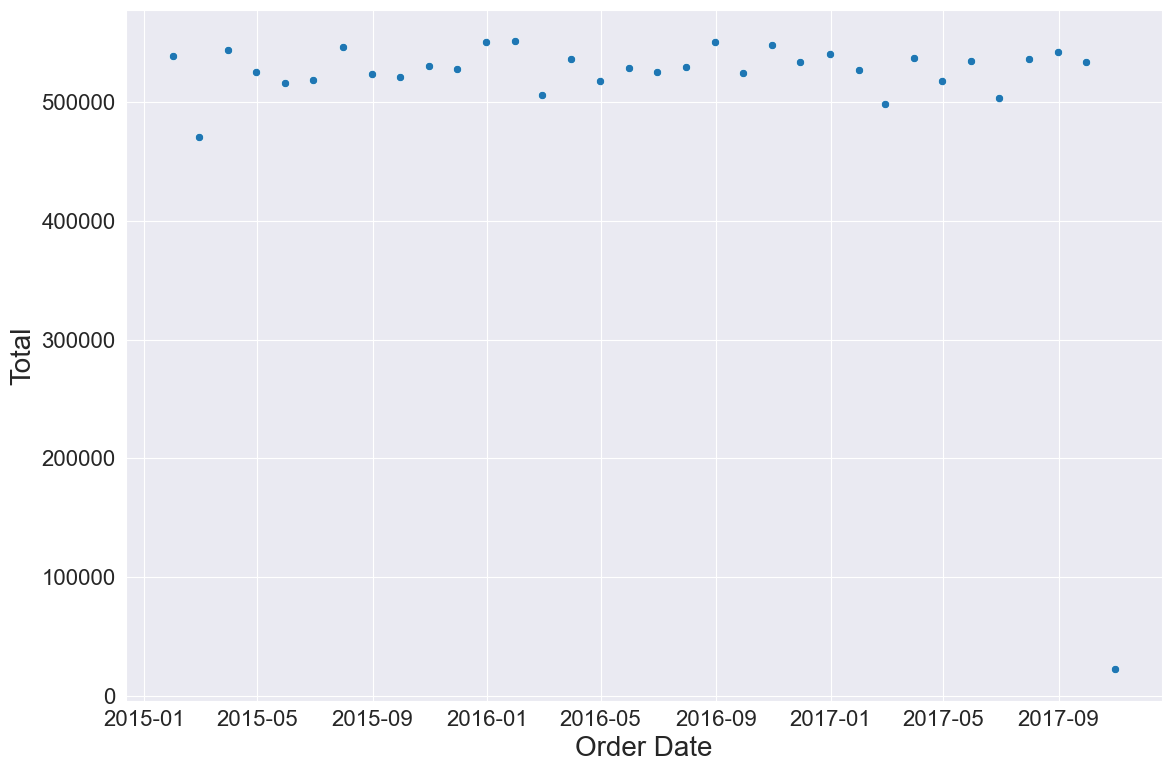

In [88]:
#Plotting the total column's sales without outlier sales
plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(x=date_sales['Order Date'], y=y)
plt.show()

In [89]:
#Adding the constant and model fitting
numeric = pd.to_numeric(date_sales['Order Date'],errors='raise', downcast=None)
x = sm.add_constant(days_elapsed_reshaped) # adding a constant
y = date_sales['Total'][:-1]
lm = sm.OLS(y,x).fit() # fitting the model
lm.predict(x)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Total   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                 -0.016
Method:                 Least Squares   F-statistic:                    0.5049
Date:                Fri, 31 Mar 2023   Prob (F-statistic):              0.483
Time:                        22:30:31   Log-Likelihood:                -367.41
No. Observations:                  33   AIC:                             738.8
Df Residuals:                      31   BIC:                             741.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.248e+05   5802.211     90.443      0.000    5.13e+05    5.37e+05
x1             7.2865     10.254      0.711      0.483     -13.627      28.200
==============================================================================
Omnibus:                       11.806   Durbin-Watson:                   2.560
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.652
Skew:                          -1.118   Prob(JB):                      0.00295
Kurtosis:                       4.865   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [90]:
# Days coef: 7.2865
# Constant coef: 524800

# Linear equation: 𝑦 = 𝑎𝑥 + 𝑏
y_pred = 7.2865*x[:,1] + 524800

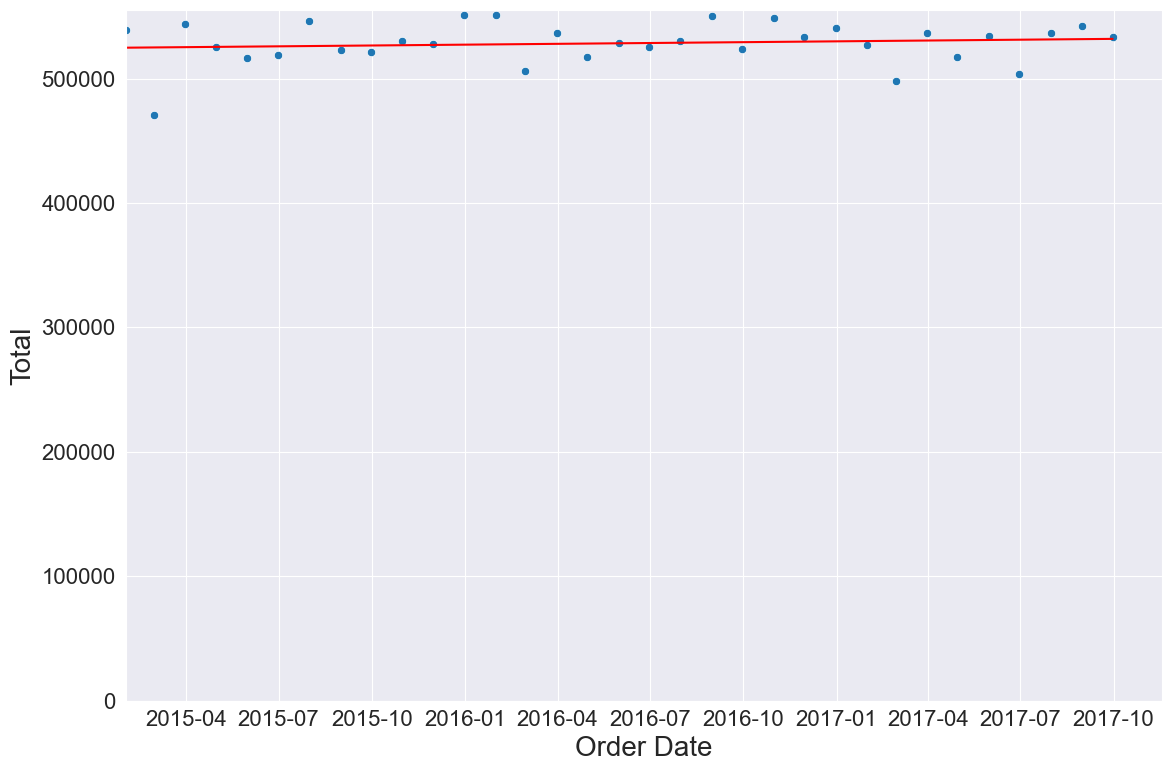

In [91]:
# plotting the data points
plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(x=date_sales['Order Date'][:-1], y=y)

#plotting the  
sns.lineplot(x=date_sales['Order Date'][:-1],y=y_pred.flatten(), color='red')

#axes
plt.xlim(date_sales['Order Date'][0])
plt.ylim(0)
plt.show()

Based on the 2 linear regressions, sales data from October 2017 until January 2018 are abnormal, being low or non-existent. The following linear regressions will exclude these months.

### Cleats

In [92]:
#Adding the constant and model fitting
numeric = pd.to_numeric(date_sales['Order Date'],errors='raise', downcast=None)
x = sm.add_constant(days_elapsed_reshaped) # adding a constant
y = date_sales['Cleats'][:-1]
lm = sm.OLS(y,x).fit() # fitting the model
lm.predict(x)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Cleats   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                  0.005703
Date:                Fri, 31 Mar 2023   Prob (F-statistic):              0.940
Time:                        22:30:32   Log-Likelihood:                -334.20
No. Observations:                  33   AIC:                             672.4
Df Residuals:                      31   BIC:                             675.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.156e+05   2121.232     54.479      0.000    1.11e+05     1.2e+05
x1            -0.2831      3.749     -0.076      0.940      -7.929       7.363
==============================================================================
Omnibus:                        4.512   Durbin-Watson:                   2.634
Prob(Omnibus):                  0.105   Jarque-Bera (JB):                3.000
Skew:                          -0.646   Prob(JB):                        0.223
Kurtosis:                       3.715   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
# Days coef: -0.2831
# Constant coef: 115600

# Linear equation: 𝑦 = 𝑎𝑥 + 𝑏
y_pred = -0.2831*x[:,1] + 115600

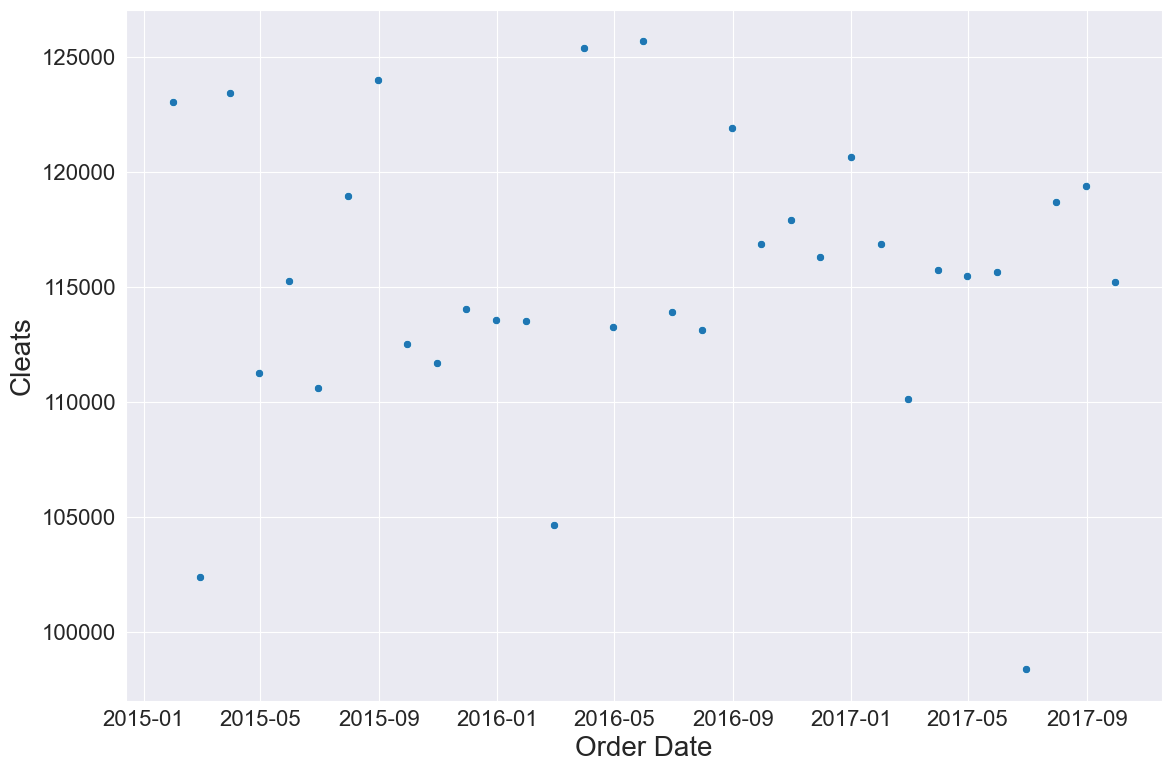

In [94]:
#Plotting the Cleats column's sales
plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(x=date_sales['Order Date'], y=y)
plt.show()

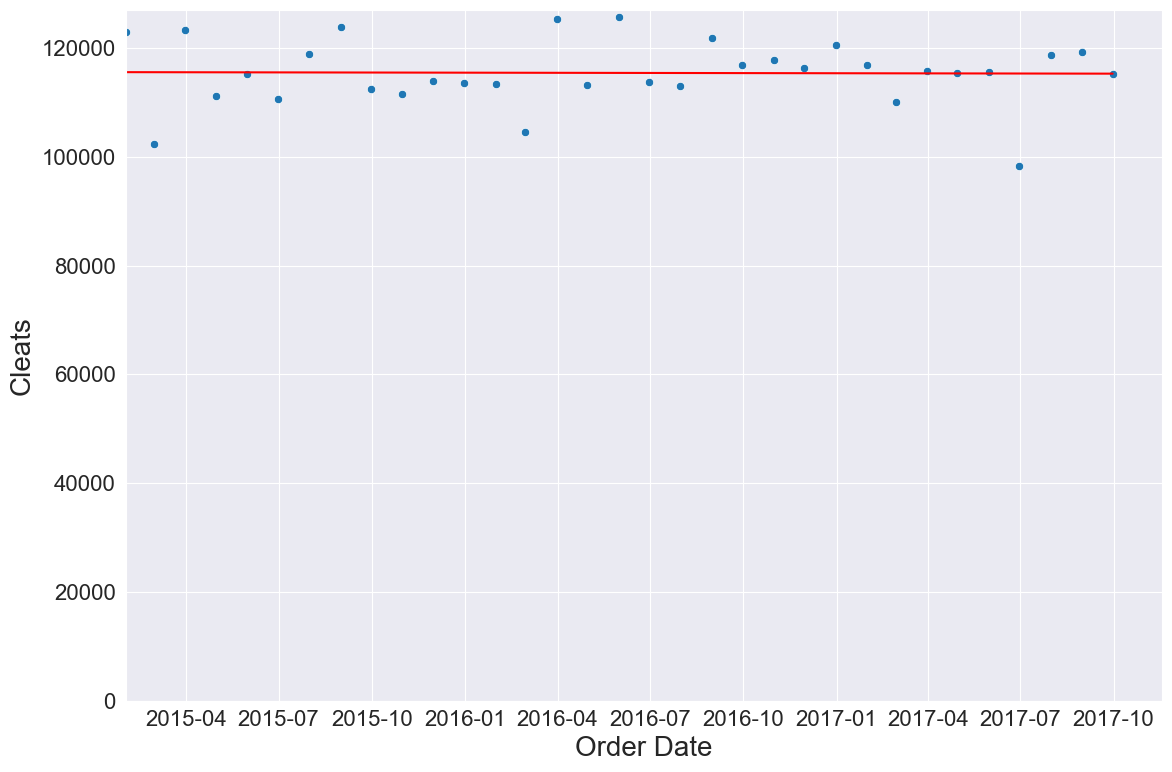

In [95]:
# plotting the data points
plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(x=date_sales['Order Date'][:-1], y=y)

#plotting the  
sns.lineplot(x=date_sales['Order Date'][:-1],y=y_pred.flatten(), color='red')

#axes
plt.xlim(date_sales['Order Date'][0])
plt.ylim(0)
plt.show()

### Men's Footwear

In [96]:
#Adding the constant and model fitting
numeric = pd.to_numeric(date_sales['Order Date'],errors='raise', downcast=None)
x = sm.add_constant(days_elapsed_reshaped) # adding a constant
y = date_sales['Mens_Footwear'][:-1]
lm = sm.OLS(y,x).fit() # fitting the model
lm.predict(x)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Mens_Footwear   R-squared:                       0.100
Model:                            OLS   Adj. R-squared:                  0.071
Method:                 Least Squares   F-statistic:                     3.430
Date:                Fri, 31 Mar 2023   Prob (F-statistic):             0.0736
Time:                        22:30:33   Log-Likelihood:                -318.73
No. Observations:                  33   AIC:                             641.5
Df Residuals:                      31   BIC:                             644.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.305e+04   1327.034     55.048      0.000    7.03e+04    7.58e+04
x1             4.3434      2.345      1.852      0.074      -0.440       9.127
==============================================================================
Omnibus:                       10.239   Durbin-Watson:                   2.209
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               12.132
Skew:                          -0.779   Prob(JB):                      0.00232
Kurtosis:                       5.529   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
# Days coef: 4.3434
# Constant coef: 73050

# Linear equation: 𝑦 = 𝑎𝑥 + 𝑏
y_pred = 4.3434*x[:,1] + 73050

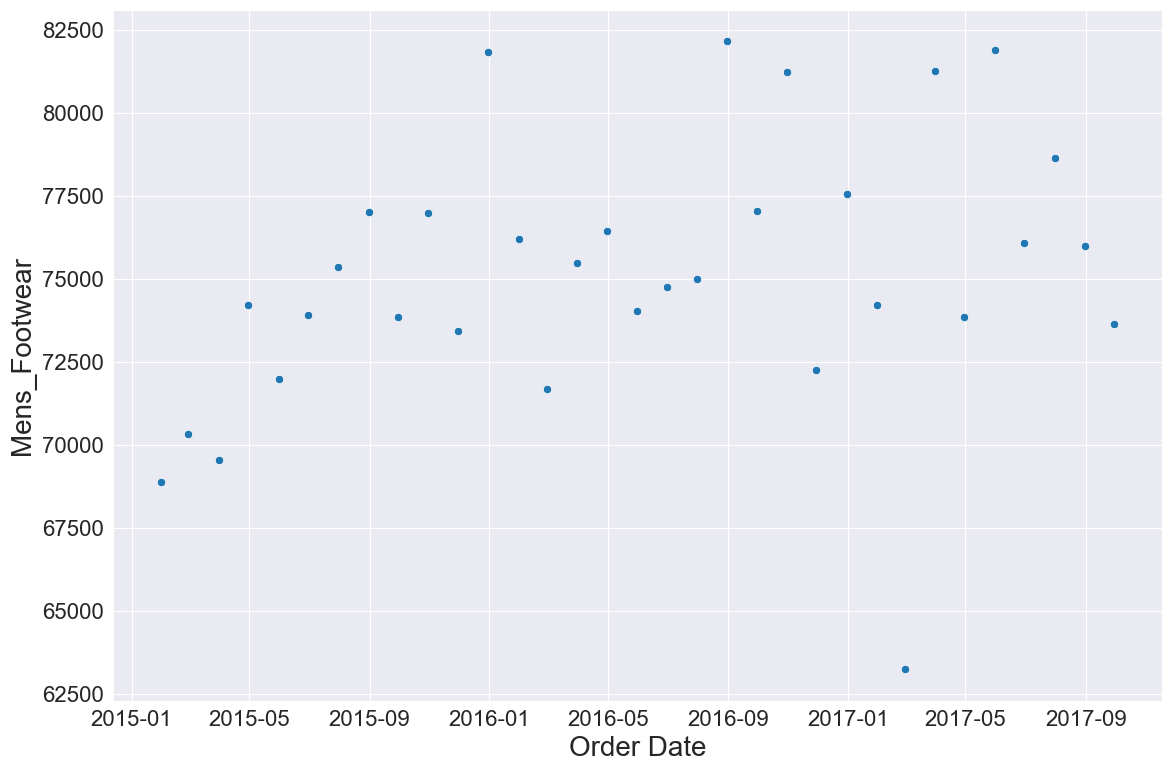

In [98]:
#Plotting the Men's Footwear column's sales
plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(x=date_sales['Order Date'], y=y)
plt.show()

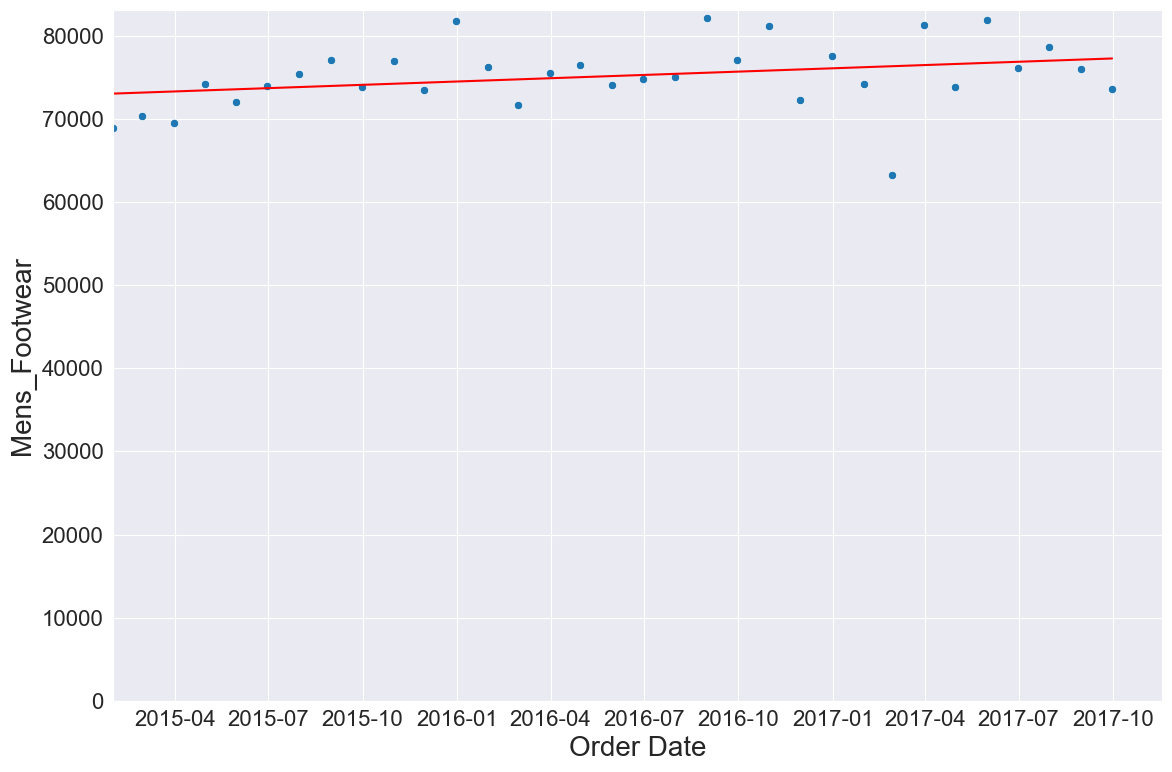

In [99]:
# plotting the data points
plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(x=date_sales['Order Date'][:-1], y=y)

#plotting the  
sns.lineplot(x=date_sales['Order Date'][:-1],y=y_pred.flatten(), color='red')

#axes
plt.xlim(date_sales['Order Date'][0])
plt.ylim(0)
plt.show()

### Womens Apparel

In [100]:
#Adding the constant and model fitting
numeric = pd.to_numeric(date_sales['Order Date'],errors='raise', downcast=None)
x = sm.add_constant(days_elapsed_reshaped) # adding a constant
y = date_sales['Womens_Apparel'][:-1]
lm = sm.OLS(y,x).fit() # fitting the model
lm.predict(x)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Womens_Apparel   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.032
Method:                 Least Squares   F-statistic:                  0.003091
Date:                Fri, 31 Mar 2023   Prob (F-statistic):              0.956
Time:                        22:30:34   Log-Likelihood:                -324.98
No. Observations:                  33   AIC:                             654.0
Df Residuals:                      31   BIC:                             656.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8.184e+04   1603.781     51.029      0.000    7.86e+04    8.51e+04
x1             0.1576      2.834      0.056      0.956      -5.623       5.938
==============================================================================
Omnibus:                        2.711   Durbin-Watson:                   2.615
Prob(Omnibus):                  0.258   Jarque-Bera (JB):                1.850
Skew:                           0.576   Prob(JB):                        0.397
Kurtosis:                       3.135   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [101]:
# Days coef: 0.1576
# Constant coef: 81840

# Linear equation: 𝑦 = 𝑎𝑥 + 𝑏
y_pred = 0.1576*x[:,1] + 81840

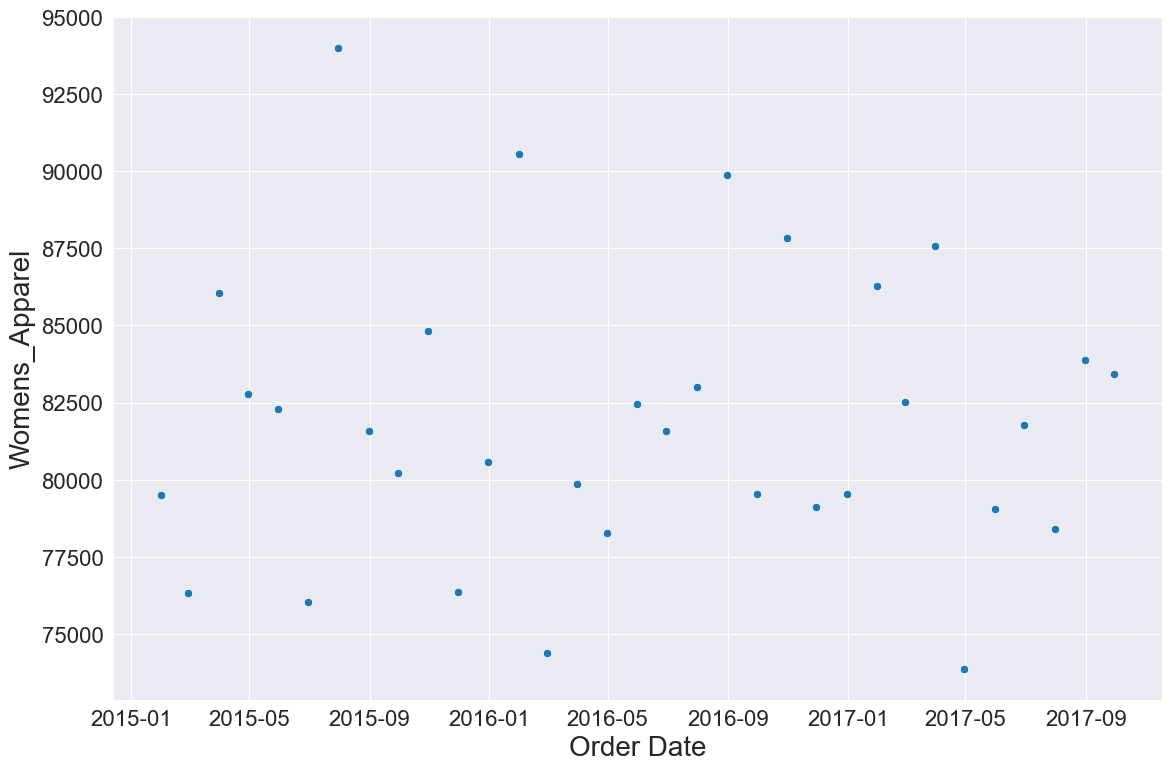

In [102]:
#Plotting the Women's Apparel column's sales
plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(x=date_sales['Order Date'], y=y)
plt.show()

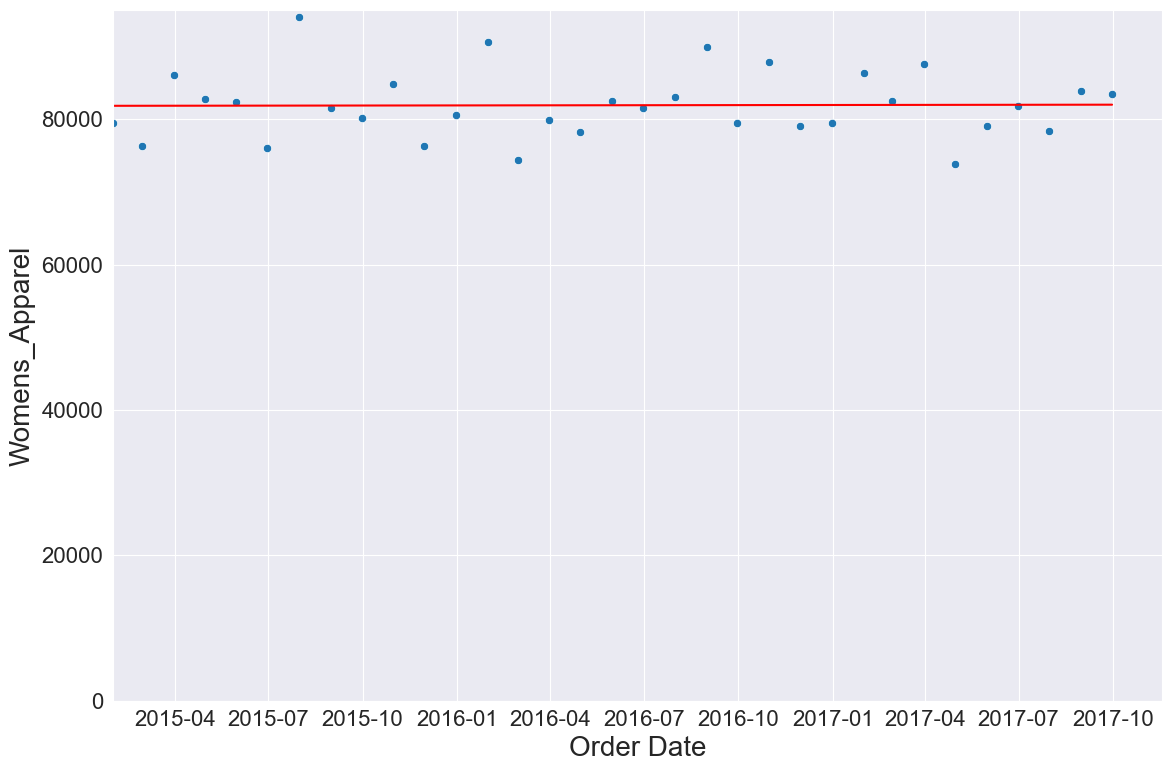

In [103]:
# plotting the data points
plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(x=date_sales['Order Date'][:-1], y=y)

#plotting the  
sns.lineplot(x=date_sales['Order Date'][:-1],y=y_pred.flatten(), color='red')

#axes
plt.xlim(date_sales['Order Date'][0])
plt.ylim(0)
plt.show()

### Indoor / Outdoor Games

In [104]:
#Adding the constant and model fitting
numeric = pd.to_numeric(date_sales['Order Date'],errors='raise', downcast=None)
x = sm.add_constant(days_elapsed_reshaped) # adding a constant
y = date_sales['In_Out_Games'][:-1]
lm = sm.OLS(y,x).fit() # fitting the model
lm.predict(x)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           In_Out_Games   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.9325
Date:                Fri, 31 Mar 2023   Prob (F-statistic):              0.342
Time:                        22:30:36   Log-Likelihood:                -324.48
No. Observations:                  33   AIC:                             653.0
Df Residuals:                      31   BIC:                             656.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.653e+04   1579.781     48.446      0.000    7.33e+04    7.98e+04
x1            -2.6961      2.792     -0.966      0.342      -8.390       2.998
==============================================================================
Omnibus:                        0.245   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.215
Skew:                          -0.169   Prob(JB):                        0.898
Kurtosis:                       2.796   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [105]:
# Days coef: -2.6961
# Constant coef: 76530

# Linear equation: 𝑦 = 𝑎𝑥 + 𝑏
y_pred = -2.6961*x[:,1] + 76530

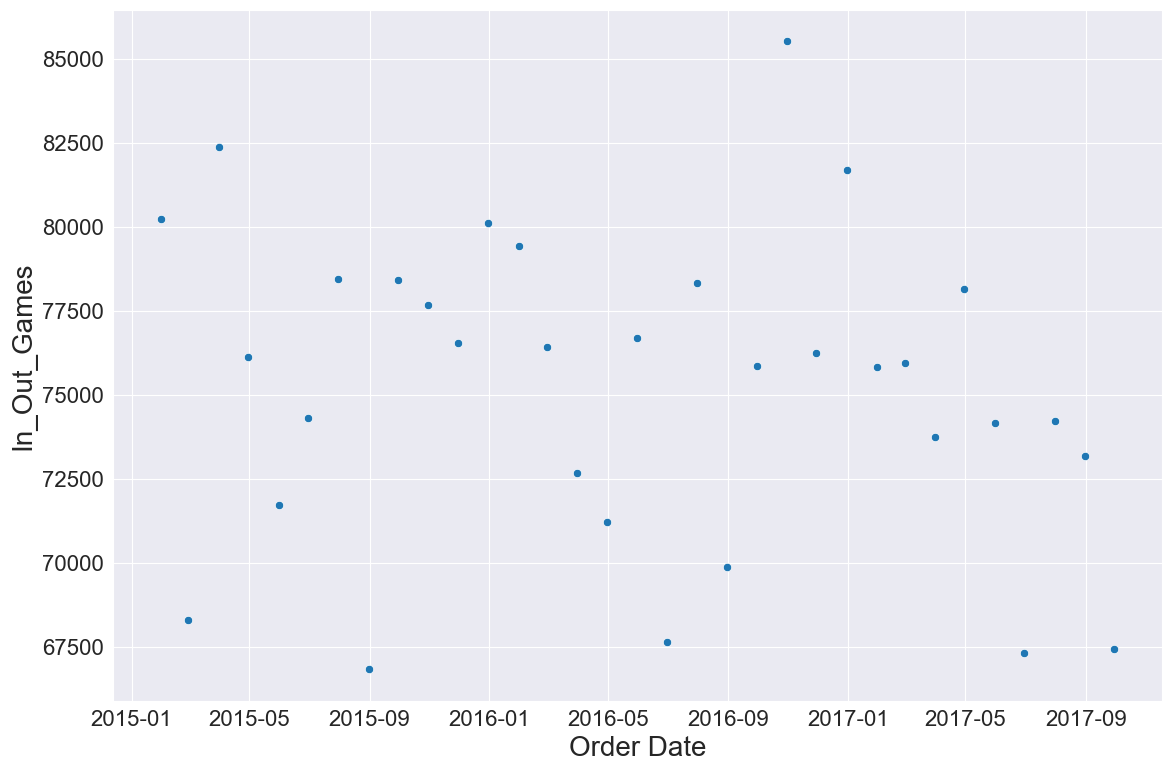

In [106]:
#Plotting the Indoor/ Outdoor Games column's sales
plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(x=date_sales['Order Date'], y=y)
plt.show()

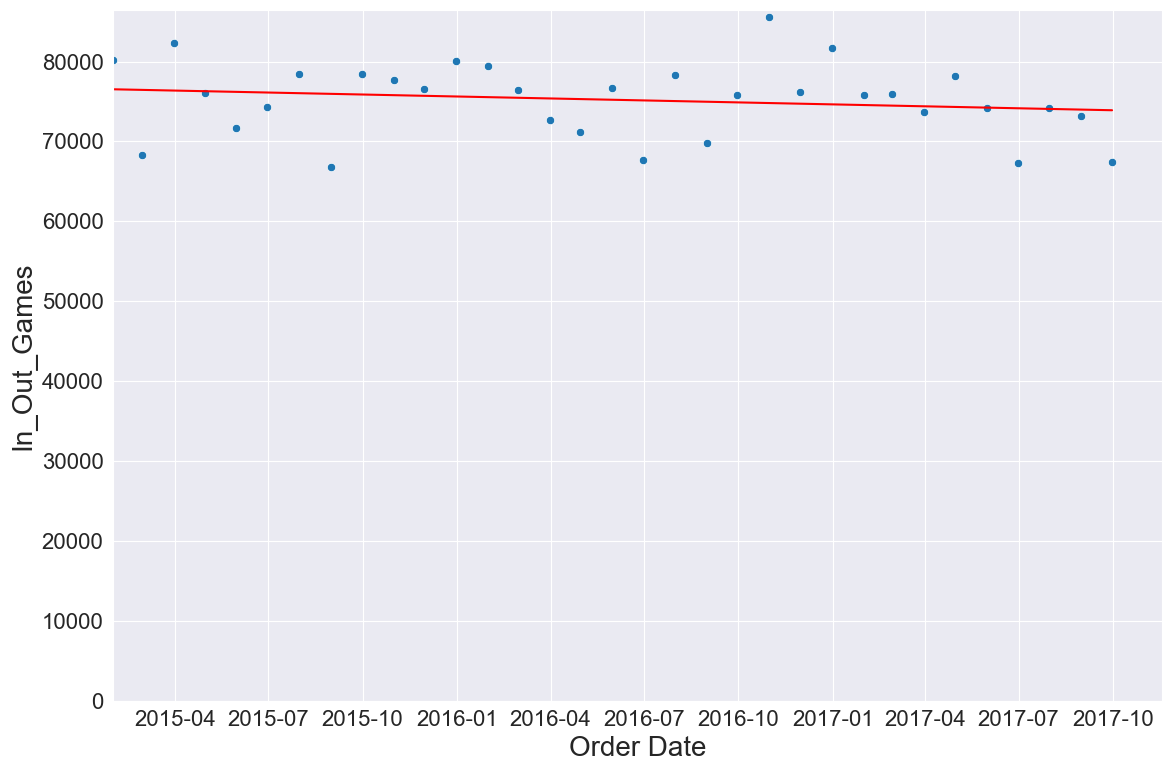

In [107]:
# plotting the data points
plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(x=date_sales['Order Date'][:-1], y=y)

#plotting the  
sns.lineplot(x=date_sales['Order Date'][:-1],y=y_pred.flatten(), color='red')

#axes
plt.xlim(date_sales['Order Date'][0])
plt.ylim(0)
plt.show()

### Fishing

In [108]:
#Adding the constant and model fitting
numeric = pd.to_numeric(date_sales['Order Date'],errors='raise', downcast=None)
x = sm.add_constant(days_elapsed_reshaped) # adding a constant
y = date_sales['Fishing'][:-1]
lm = sm.OLS(y,x).fit() # fitting the model
lm.predict(x)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Fishing   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.362
Date:                Fri, 31 Mar 2023   Prob (F-statistic):              0.252
Time:                        22:30:37   Log-Likelihood:                -343.31
No. Observations:                  33   AIC:                             690.6
Df Residuals:                      31   BIC:                             693.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.778e+05   2795.338     63.601      0.000    1.72e+05    1.83e+05
x1             5.7648      4.940      1.167      0.252      -4.311      15.840
==============================================================================
Omnibus:                        7.042   Durbin-Watson:                   1.790
Prob(Omnibus):                  0.030   Jarque-Bera (JB):                5.520
Skew:                          -0.793   Prob(JB):                       0.0633
Kurtosis:                       4.224   Cond. No.                     1.10e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [109]:
# Days coef: 5.7648
# Constant coef: 177800

# Linear equation: 𝑦 = 𝑎𝑥 + 𝑏
y_pred = 5.7648*x[:,1] + 177800

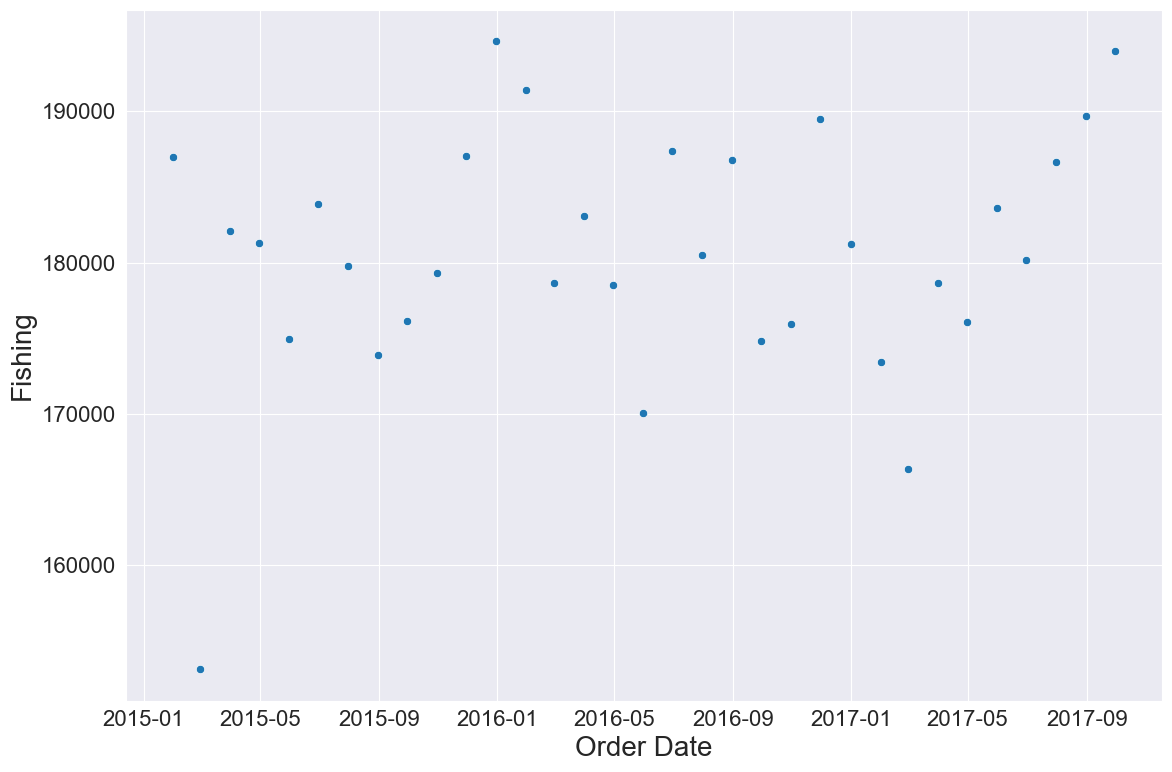

In [110]:
#Plotting the Fishing column's sales
plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(x=date_sales['Order Date'], y=y)
plt.show()

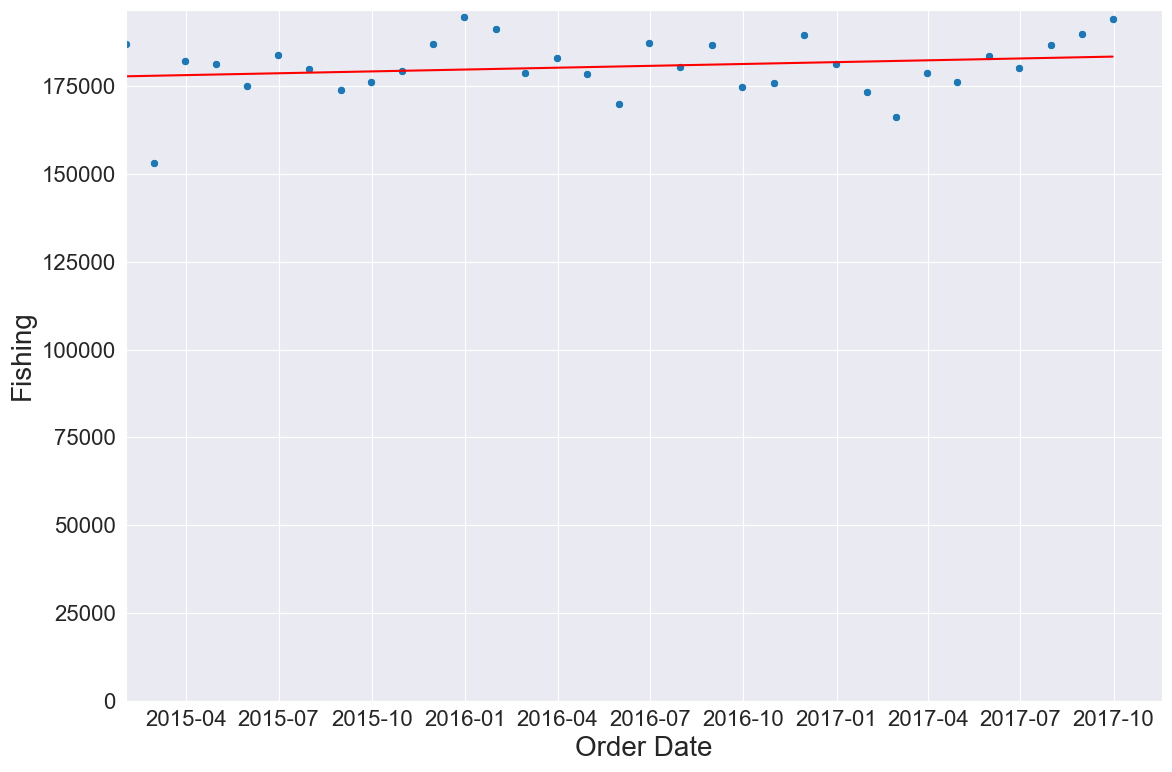

In [111]:
# plotting the data points
plt.figure(figsize=(12, 8), tight_layout=True)
sns.scatterplot(x=date_sales['Order Date'][:-1], y=y)

#plotting the  
sns.lineplot(x=date_sales['Order Date'][:-1],y=y_pred.flatten(), color='red')

#axes
plt.xlim(date_sales['Order Date'][0])
plt.ylim(0)
plt.show()

Order Statuses with Suspected Fraud and Cancelled values were not considered for this linear regression model.

The range dates for this dataset is from January 1, 2015 until January 31, 2018. However, during the analysis, it was discovered that the sales from October 2017 until January 2018 were abnormal; hence, these months were excluded from this analysis.

Based on the linear regression models above, only Men's Footwear and Fishing have a slight growth year over year, while the rest of the top 5 categories, Cleats, Women's Apparel, and Indoor/ Outdoor Games, have flat sales.

The following are the linear regression formulas for future sales calculations:
- Top 5 Categories = 7.2865 * x + 524800
- Cleats = -0.2831 * x + 115600
- Men's Footwear = 4.3434 * x + 73050
- Women's Apparel = 0.1576 * x + 81840
- Indoor/ Outdoor Games = -2.6961 * x + 76530
- Fishing = 5.7648 * x + 177800

# References:
https://connectif.ai/en/what-are-rfm-scores-and-how-to-calculate-them/

https://www.geeksforgeeks.org/rfm-analysis-analysis-using-python/

https://365datascience.com/tutorials/python-tutorials/market-basket-analysis/

http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/

https://predictivehacks.com/a-tutorial-about-market-basket-analysis-in-python/